# PROMPT 1: Are there population characteristics income/race/age/education etc that are correlated with low access to nature-based solutions or increased climate risk?

Alternative Title: NBS/Climate Risk vs Demographics

Import statements. Import important libraries needed to conduct data analysis and visualizations 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import json
import requests
import geopandas as gpd
import math

## FIRST PERSPECTIVE: CLIMATE RISK (US EPA)

### Data Cleaning

1. Raw Data Set

In [ ]:
ejdata = pd.read_csv(r'/work/EJSCREEN_2022_Full_with_AS_CNMI_GU_VI.csv')
ejdata.head()

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (124,125,136,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OBJECTID,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,VULEOPCTSUP,P_VULEOPCTSUP,B_VULEOPCTSUP,T_VULEOPCTSUP,Shape_Length,Shape_Area
0,1,10010201001,Alabama,AL,Autauga County,4,674.0,674.0,484.0,290.0,...,4264299.0,28435.0,0.0,0.0,0.160075,64.0,7.0,64 %ile,13436.899283,6.047647e+06
1,2,10010201002,Alabama,AL,Autauga County,4,1267.0,1267.0,825.0,403.0,...,5561005.0,0.0,0.0,0.0,0.110963,40.0,5.0,40 %ile,11951.835191,7.837850e+06
2,3,10010202001,Alabama,AL,Autauga County,4,706.0,672.0,423.0,227.0,...,2058374.0,0.0,0.0,0.0,0.171895,69.0,7.0,69 %ile,7770.915673,2.900765e+06
3,4,10010202002,Alabama,AL,Autauga County,4,1051.0,839.0,890.0,346.0,...,1262444.0,5669.0,0.0,0.0,0.132701,52.0,6.0,52 %ile,6500.548572,1.786491e+06
4,5,10010203001,Alabama,AL,Autauga County,4,2912.0,2912.0,1972.0,1034.0,...,3866513.0,9054.0,0.0,0.0,0.085606,25.0,3.0,25 %ile,11070.368720,5.461598e+06


2. Selecting only areas within the 9 Bay Area counties.

In [ ]:
california_string = ejdata["STATE_NAME"][30000]

In [ ]:
#filtering the ejdata set 
ejdata = ejdata[ejdata["STATE_NAME"] == california_string]
bay_area_counties = ['Marin County', 'San Mateo County', 'Napa County', 'Contra Costa County', 'Santa Clara County', 'Alameda County', 'Sonoma County', 'San Francisco County', 'Solano County']
ejdata = ejdata[ejdata["CNTY_NAME"].isin(bay_area_counties)]
ejdata

,OBJECTID,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,VULEOPCTSUP,P_VULEOPCTSUP,B_VULEOPCTSUP,T_VULEOPCTSUP,Shape_Length,Shape_Area
11496,11497,60014001001,California,CA,Alameda County,9,1713.0,1701.0,1277.0,644.0,...,5737663.0,0.0,0.0,0.0,0.047299,5.0,1.0,5 %ile,14319.567790,9.222661e+06
11497,11498,60014001002,California,CA,Alameda County,9,1322.0,1313.0,1135.0,630.0,...,1208194.0,0.0,0.0,0.0,0.044671,4.0,1.0,4 %ile,10470.158535,1.941369e+06
11498,11499,60014002001,California,CA,Alameda County,9,940.0,940.0,731.0,417.0,...,288070.0,0.0,0.0,0.0,0.048085,5.0,1.0,5 %ile,3776.258099,4.627897e+05
11499,11500,60014002002,California,CA,Alameda County,9,1043.0,1027.0,874.0,413.0,...,298490.0,0.0,0.0,0.0,0.082048,23.0,3.0,23 %ile,4019.010837,4.794874e+05
11500,11501,60014003001,California,CA,Alameda County,9,1206.0,1206.0,905.0,423.0,...,265695.0,0.0,0.0,0.0,0.032521,1.0,1.0,1 %ile,3231.259100,4.267776e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35600,35601,60971543061,California,CA,Sonoma County,9,548.0,548.0,477.0,313.0,...,12880490.0,1106.0,0.0,0.0,0.079437,22.0,3.0,22 %ile,30645.800262,2.102145e+07
35601,35602,60971543062,California,CA,Sonoma County,9,1014.0,1014.0,985.0,564.0,...,30455107.0,0.0,0.0,0.0,0.069513,16.0,2.0,16 %ile,33281.740055,4.964135e+07
35602,35603,60971543071,California,CA,Sonoma County,9,684.0,684.0,667.0,362.0,...,108897903.0,16987374.0,0.0,0.0,0.101381,35.0,4.0,35 %ile,135146.536589,2.063009e+08
35603,35604,60971543081,California,CA,Sonoma County,9,812.0,812.0,704.0,428.0,...,24876700.0,8711623.0,0.0,0.0,0.117513,44.0,5.0,44 %ile,69356.146822,5.528198e+07


3. Dropping unnecessary columns and changing granularity of data from block-level to tract-level using group_by.

In [ ]:
#Dropping unnecessary columns 
ejdata = ejdata.loc[:, ~ejdata.columns.str.startswith('B_')]
ejdata = ejdata.loc[:, ~ejdata.columns.str.startswith('T_')]

In [ ]:
# Creating a census tract column
ejdata['Census_Tract'] = ejdata['ID']//10
ejdata

,OBJECTID,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,VULEOPCTSUP,P_VULEOPCTSUP,Shape_Length,Shape_Area,Census_Tract
11496,11497,60014001001,California,CA,Alameda County,9,1713.0,1701.0,1277.0,644.0,...,0.0,5737663.0,0.0,0.0,0.0,0.047299,5.0,14319.567790,9.222661e+06,6001400100
11497,11498,60014001002,California,CA,Alameda County,9,1322.0,1313.0,1135.0,630.0,...,0.0,1208194.0,0.0,0.0,0.0,0.044671,4.0,10470.158535,1.941369e+06,6001400100
11498,11499,60014002001,California,CA,Alameda County,9,940.0,940.0,731.0,417.0,...,0.0,288070.0,0.0,0.0,0.0,0.048085,5.0,3776.258099,4.627897e+05,6001400200
11499,11500,60014002002,California,CA,Alameda County,9,1043.0,1027.0,874.0,413.0,...,0.0,298490.0,0.0,0.0,0.0,0.082048,23.0,4019.010837,4.794874e+05,6001400200
11500,11501,60014003001,California,CA,Alameda County,9,1206.0,1206.0,905.0,423.0,...,0.0,265695.0,0.0,0.0,0.0,0.032521,1.0,3231.259100,4.267776e+05,6001400300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35600,35601,60971543061,California,CA,Sonoma County,9,548.0,548.0,477.0,313.0,...,0.0,12880490.0,1106.0,0.0,0.0,0.079437,22.0,30645.800262,2.102145e+07,6097154306
35601,35602,60971543062,California,CA,Sonoma County,9,1014.0,1014.0,985.0,564.0,...,0.0,30455107.0,0.0,0.0,0.0,0.069513,16.0,33281.740055,4.964135e+07,6097154306
35602,35603,60971543071,California,CA,Sonoma County,9,684.0,684.0,667.0,362.0,...,0.0,108897903.0,16987374.0,0.0,0.0,0.101381,35.0,135146.536589,2.063009e+08,6097154307
35603,35604,60971543081,California,CA,Sonoma County,9,812.0,812.0,704.0,428.0,...,0.0,24876700.0,8711623.0,0.0,0.0,0.117513,44.0,69356.146822,5.528198e+07,6097154308


In [ ]:
tractejdata = ejdata.groupby('Census_Tract').mean()
tractejdata

,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,VULEOPCT,...,P_PWDIS_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,VULEOPCTSUP,P_VULEOPCTSUP,Shape_Length,Shape_Area
Census_Tract,,,,,,,,,,,,,,,,,,,,,
6001400100,11497.5,6.001400e+10,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.500000,793.500000,0.175632,...,NaN,0.00,3.472928e+06,0.000000e+00,0.0,0.0,0.045985,4.500000,12394.863162,5.582015e+06
6001400200,11499.5,6.001400e+10,9.0,991.500000,983.500000,802.500000,415.000000,428.000000,617.000000,0.199642,...,NaN,0.00,2.932800e+05,0.000000e+00,0.0,0.0,0.065066,14.000000,3897.634468,4.711386e+05
6001400300,11502.5,6.001400e+10,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.500000,818.250000,0.255169,...,NaN,1.25,2.777100e+05,0.000000e+00,0.0,0.0,0.068939,17.500000,3585.213907,4.460350e+05
6001400400,11506.0,6.001400e+10,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.000000,867.333333,0.277090,...,NaN,0.00,2.387127e+05,0.000000e+00,0.0,0.0,0.082872,24.000000,2764.220329,3.834810e+05
6001400500,11509.0,6.001401e+10,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.000000,885.333333,0.373120,...,NaN,3.00,1.971413e+05,0.000000e+00,0.0,0.0,0.096649,31.666667,2393.621286,3.167009e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6097154305,35599.0,6.097154e+10,9.0,753.000000,726.333333,601.000000,293.666667,460.333333,403.333333,0.198599,...,NaN,0.00,3.154498e+07,3.201188e+06,0.0,0.0,0.120863,45.666667,38585.629298,5.658095e+07
6097154306,35601.5,6.097154e+10,9.0,781.000000,781.000000,731.000000,438.500000,675.500000,459.000000,0.157302,...,8.0,0.00,2.166780e+07,5.530000e+02,0.0,0.0,0.074475,19.000000,31963.770159,3.533140e+07
6097154307,35603.0,6.097154e+10,9.0,684.000000,684.000000,667.000000,362.000000,1051.000000,208.000000,0.215643,...,NaN,0.00,1.088979e+08,1.698737e+07,0.0,0.0,0.101381,35.000000,135146.536589,2.063009e+08


![Picture title](image-20221030-185947.png)

### Exploring the Environmental Justice dataset

1. Creating a function to remove outliers. 

In [ ]:
def find_outliers(data, variable): 
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a copy of the original dataframe with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    iqr = data[variable].describe().get('75%') - data[variable].describe().get('25%')
    upper = data[variable].describe().get('75%') + (1.5 * iqr)
    lower = data[variable].describe().get('25%') - (1.5 * iqr)
    return [lower, upper]

2. Dropping columns with all missing, or N/A values, which are printed directly below the code cell.

In [ ]:
#dropping columns 
cols_to_drop = []
for column in tractejdata.columns.values:
    num_na = sum(tractejdata[column].isna())
    if num_na > 0:
        #print(column, num_na)
        if num_na == 1039:
            cols_to_drop.append(column)
print("Columns dropped: ", cols_to_drop)
tractejdata = tractejdata.drop(columns = cols_to_drop).dropna()
tractejdata

Columns dropped:  ['PWDIS', 'D_PWDIS_2', 'P_PWDIS', 'P_PWDIS_D2']


,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,VULEOPCT,...,P_UST_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,VULEOPCTSUP,P_VULEOPCTSUP,Shape_Length,Shape_Area
Census_Tract,,,,,,,,,,,,,,,,,,,,,
6001400100,11497.5,6.001400e+10,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,0.175632,...,0.00,0.00,3.472928e+06,0.00,0.0,0.00,0.045985,4.500000,12394.863162,5.582015e+06
6001400200,11499.5,6.001400e+10,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,0.199642,...,61.00,0.00,2.932800e+05,0.00,0.0,0.00,0.065066,14.000000,3897.634468,4.711386e+05
6001400300,11502.5,6.001400e+10,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,0.255169,...,44.50,1.25,2.777100e+05,0.00,0.0,0.00,0.068939,17.500000,3585.213907,4.460350e+05
6001400400,11506.0,6.001400e+10,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,0.277090,...,73.00,0.00,2.387127e+05,0.00,0.0,0.00,0.082872,24.000000,2764.220329,3.834810e+05
6001400500,11509.0,6.001401e+10,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,0.373120,...,77.00,3.00,1.971413e+05,0.00,0.0,0.00,0.096649,31.666667,2393.621286,3.167009e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6097154100,35583.5,6.097154e+10,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,0.207149,...,6.50,0.00,1.449154e+08,107005.75,0.0,0.50,0.093342,30.000000,85895.936020,2.386545e+08
6097154201,35587.5,6.097154e+10,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,0.384866,...,66.50,1.25,6.669210e+06,4638.75,0.0,0.00,0.175306,66.750000,15475.588295,1.100837e+07
6097154202,35591.5,6.097154e+10,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,0.234247,...,39.75,0.00,4.368555e+07,3750229.25,0.0,0.25,0.094953,30.750000,46077.736490,7.817077e+07


3. Creating a function to explore the data. Takes in a demographic factor and climate risk factor, calculates and outputs the correlation, and displays a scatterplot if the correlation is greater than 0.25.

In [ ]:
# function to explore the data that takes in two factors (see photo above for column names) and compares them

def exploration(data, dem_factor, climate_risk): 
    corr = np.corrcoef(data[dem_factor], data[climate_risk])[0][1]
    if (corr >= 0.25):
        print(f"Correlation between {dem_factor} and {climate_risk}: ", corr) 

        x_limits = find_outliers(data, dem_factor)
        y_limits = find_outliers(data, climate_risk)
        
        scatter_plot = sns.jointplot(data=data, x=dem_factor, y=climate_risk, kind="reg", scatter_kws={'s':5}, xlim = (x_limits[0], x_limits[1]), ylim = (y_limits[0], y_limits[1]))
        scatter_plot.fig.suptitle(f"Scatter plot of {dem_factor} vs {climate_risk}")

        return corr  
    else:
        return


4. Identifying the demographic and climate risk variables we want to use and then putting them into our exploration function above.

In [ ]:
demographics = ['ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS', 'ACSTOTHH', 'ACSTOTHU', 'ACSUNEMPBAS', 'MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISO', 'LINGISOPCT', 'UNDER5', 'UNDER5PCT', 'OVER64', 'OVER64PCT', 'UNEMPLOYED', 'UNEMPPCT']
climate_risk = ['PRE1960PCT', 'DSLPM', 'CANCER', 'RESP', 'PTRAF', 'PNPL', 'PRMP', 'PTSDF', 'OZONE', 'PM25', 'UST']
#climate_risk.append(["D_LDPNT_2", "D_DSLPM_2", "D_CANCR_2", "D_RESP_2", "D_PTRAF_2", "D_PWDIS_2", "D_PNPL_2", "D_PRMP_2", "PTSDF_2", "D_OZONE_2", "D_PM25_5", "D_UST_2"])
#climate_risk

Correlation between ACSTOTPOP and OZONE:  0.3400891335167833
Correlation between ACSIPOVBAS and OZONE:  0.3499047352881966
Correlation between MINORPCT and PRMP:  0.36795587803327456
Correlation between LOWINCPCT and PRMP:  0.2663264654074377
Correlation between LOWINCPCT and UST:  0.2648702749740446
Correlation between LESSHSPCT and PRMP:  0.3297513338527352
Correlation between LINGISO and PTSDF:  0.2540945387676197
Correlation between UNDER5 and OZONE:  0.29455746589001247


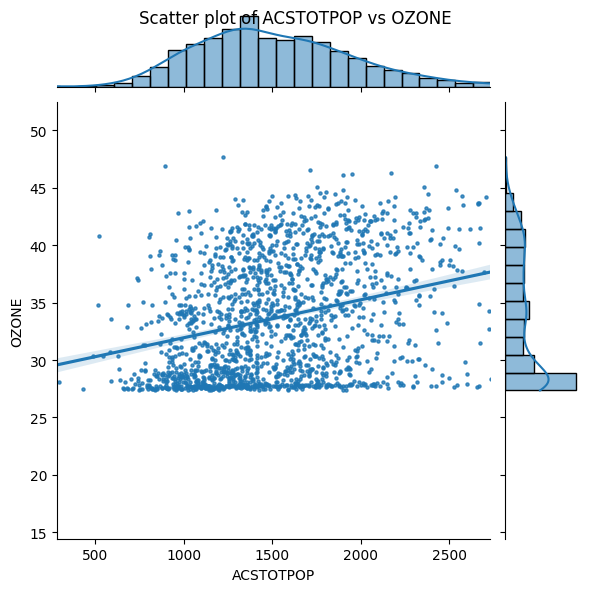

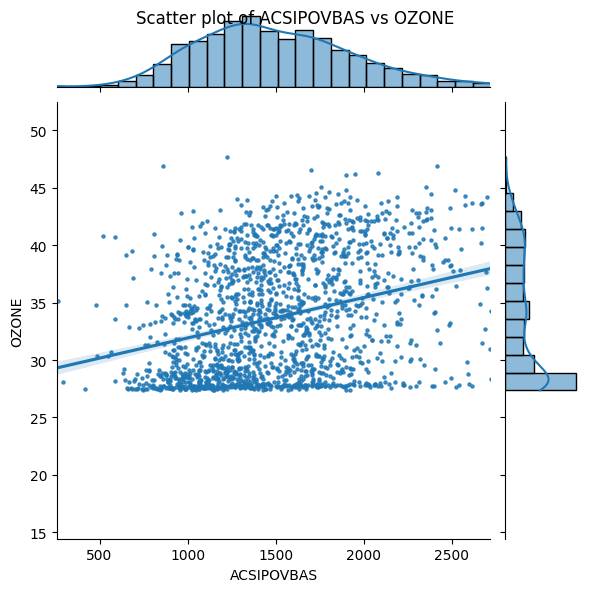

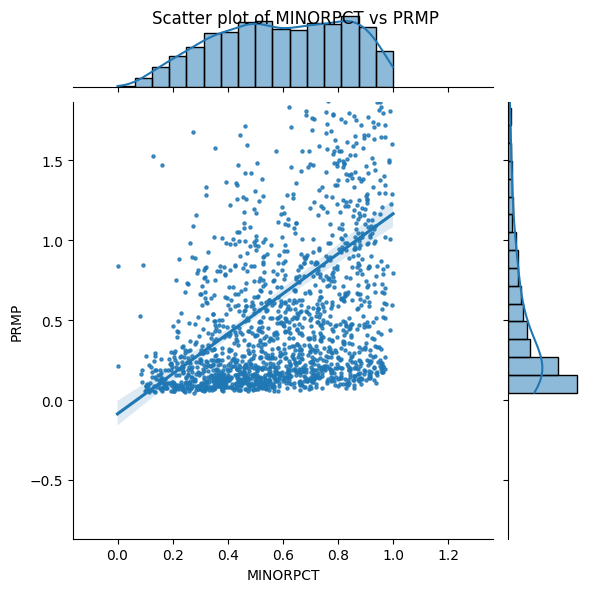

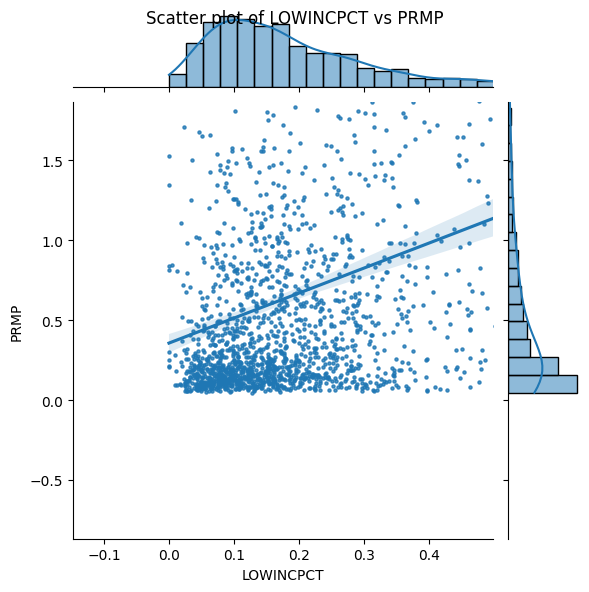

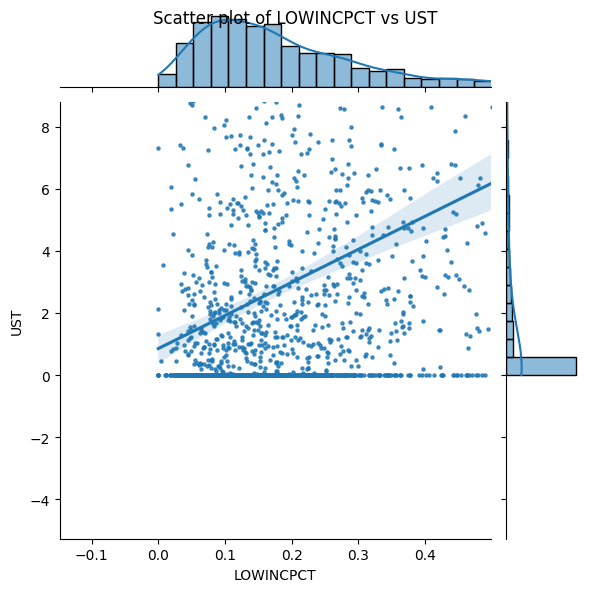

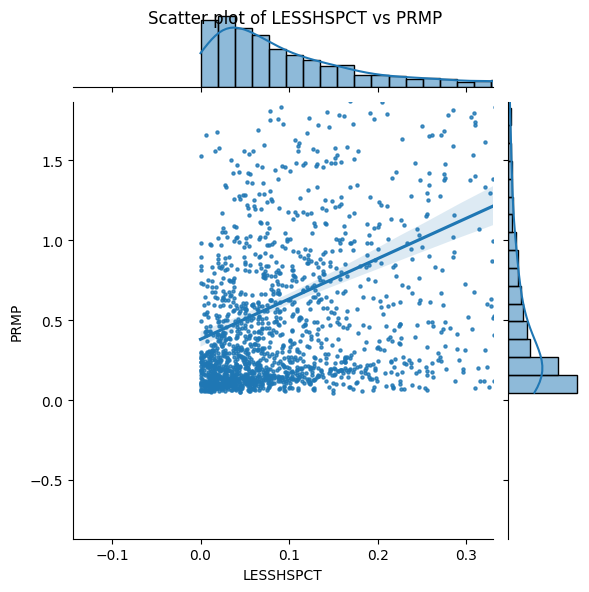

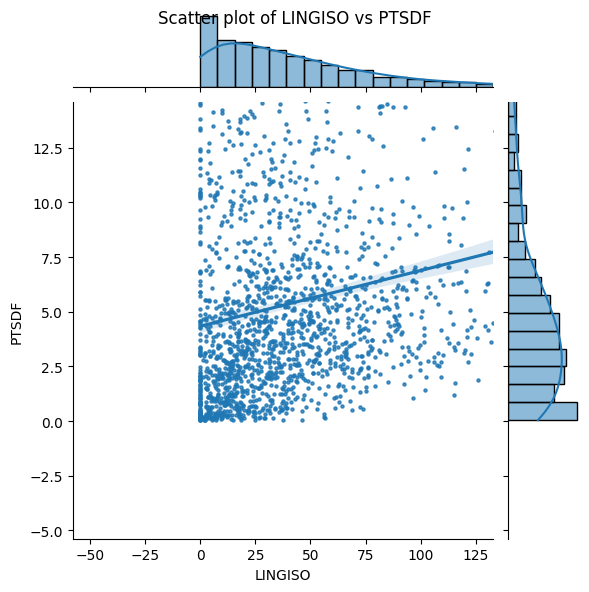

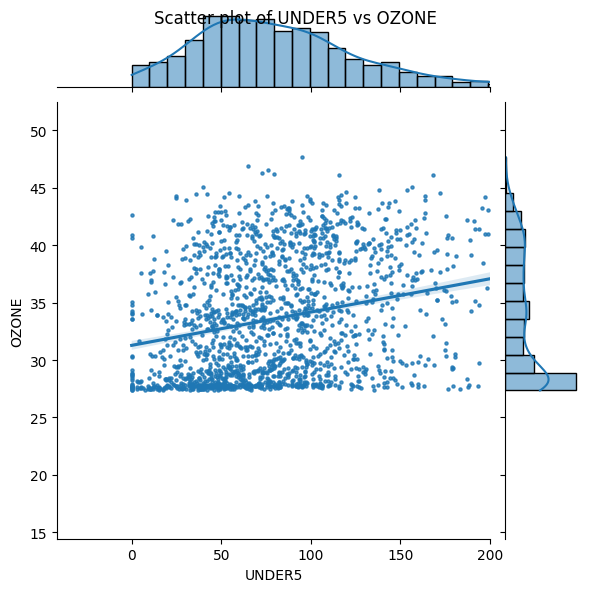

In [ ]:
for demo in demographics:
    for risk in climate_risk:
        corr = exploration(tractejdata, demo, risk)

#print(analysis)

what is ozone? why is it bad? Ozone is the principal component of the mixture of air pollutants known as "smog" that is produced from the action of sunlight on air contaminants from automobile exhausts and other sources. Ozone levels are most likely to be elevated after noon through early evening on hot, sunny days. Ozone is bad in both the short and long-term. In the short-term, ozone has been linked with eye, nose, and throat irritation in healthy people. In the long-term, ozone has been linked to permanent changes in airway structure and reductions in lung function. 

what does ozone mean in this dataset? The variable ozone represents the ozone summer seasonal avg of daily maximum 8-hour concentration in air in parts per billion. The current standard of ozone is 75 parts per billion averaged over 8 hours. luckily, in our ozone plots, ozone is not higher than our current standard of 75 parts per billion 

more info about ozone: https://www.health.ny.gov/environmental/outdoors/air/ozone.htm

5. Re-displaying the scatterplots with clearer axes, title, and colors so they are presentation-ready.

The correlation of total population and amount of ozone is  0.3400891335167833


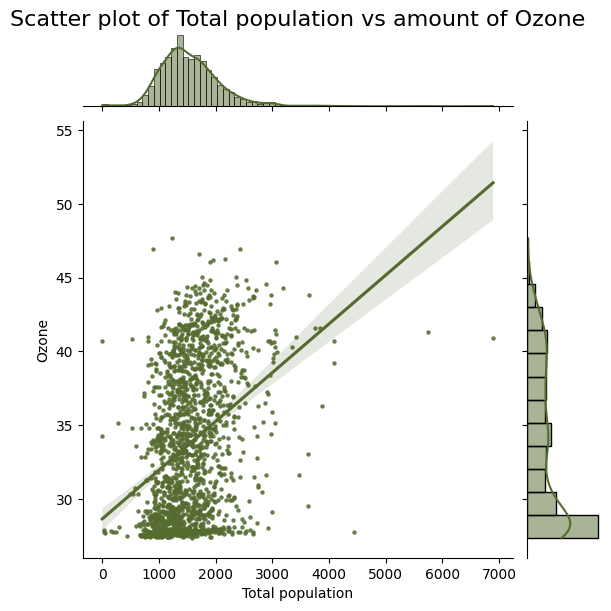

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'ACSTOTPOP', y='OZONE', kind="reg", scatter_kws={'s':5}, color="darkolivegreen")
scatter_plot.set_axis_labels(xlabel = 'Total population', ylabel = 'Ozone')
#scatter_plot.fig.suptitle(f"Scatter plot of Total population vs amount of Ozone")
plt.title('Scatter plot of Total population vs amount of Ozone', y=1.2, fontsize = 16)
corr = np.corrcoef(tractejdata['ACSTOTPOP'], tractejdata['OZONE'])
print("The correlation of total population and amount of ozone is ", corr[0][1])



Text(0.5, 1.2, 'Scatter plot of Population whose poverty status is determined vs amount of Ozone')

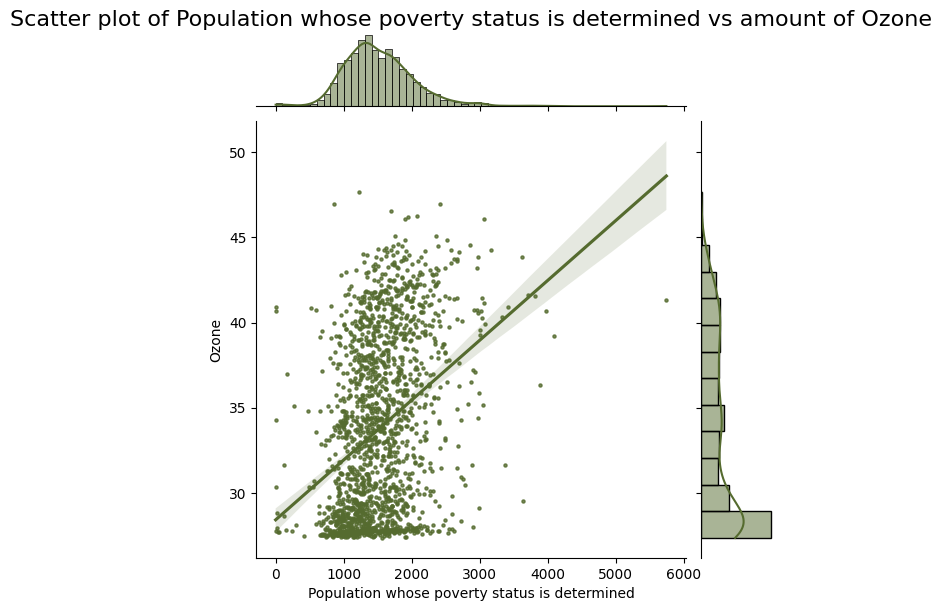

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'ACSIPOVBAS', y='OZONE', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Population whose poverty status is determined', ylabel = 'Ozone')
plt.title('Scatter plot of Population whose poverty status is determined vs amount of Ozone', y=1.2, fontsize = 16)

RMP Facility proximity: Count of RMP (potential chemical accident management plan) facilities within 5 km (or nearest one beyond 5 km), each divided by distance in kilometers. Federal data indicates about 31% of these facilities are located in areas with certain natural hazards—like wildfires and storm surges—that may be worsened by climate change. We found that EPA doesn't consistently assess how these facilities are managing risks from natural hazards and climate change. more info about RMP: https://www.gao.gov/products/gao-22-104494

Text(0.5, 1.2, 'Percent people of color vs RMP facility proximity')

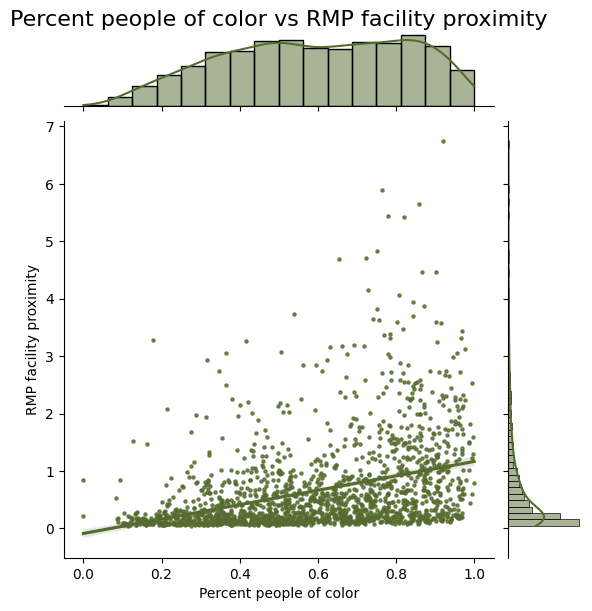

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'MINORPCT', y='PRMP', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Percent people of color', ylabel = 'RMP facility proximity')
plt.title('Percent people of color vs RMP facility proximity', y=1.2, fontsize = 16)


Text(0.5, 1.2, 'Percent of low income vs RMP facility proximity')

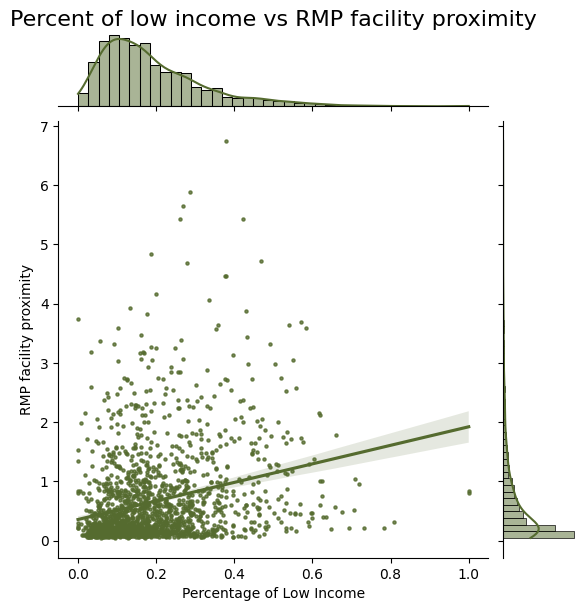

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'LOWINCPCT', y='PRMP', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Percentage of Low Income', ylabel = 'RMP facility proximity')
plt.title('Percent of low income vs RMP facility proximity', y=1.2, fontsize = 16)

Underground storage tanks: Count of leaking underground storage tanks (multiplied by a factor of 7.7) and the number of USTs within a 1,500-foot buffered block group. The greatest potential threat from a leaking UST is contamination of groundwater, the source of drinking water for nearly half of all Americans. more info: https://www.epa.gov/ust

Text(0.5, 1.05, 'Percent of low income vs Underground storage tanks')

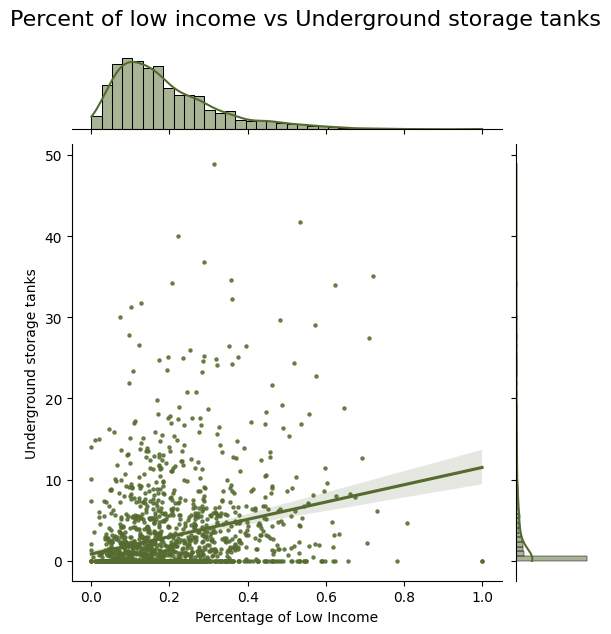

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'LOWINCPCT', y='UST', kind="reg", scatter_kws={'s':5},color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Percentage of Low Income', ylabel = 'Underground storage tanks')
scatter_plot.fig.suptitle("Percent of low income vs Underground storage tanks", y = 1.05, fontsize = 16)

Hazardous waste proximity: Count of hazardous waste facilities (TSDFs and LQGs) within 5 km (or nearest beyond 5 km), each divided by distance in kilometers	

Text(0.5, 1, 'Limited English Speaking Households vs Hazardous waste proximity')

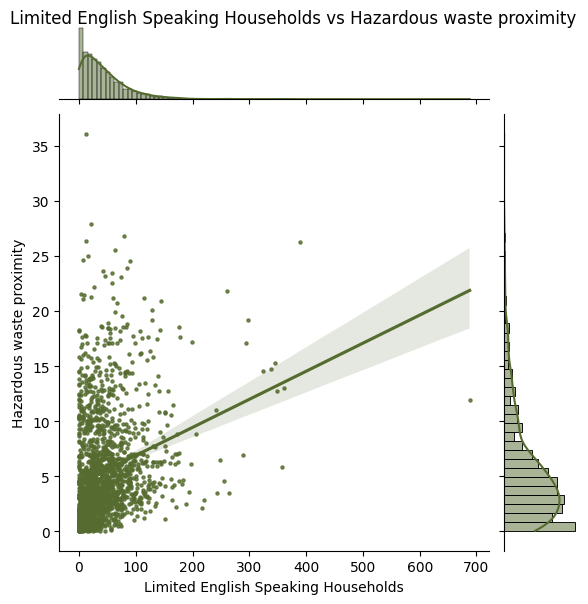

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'LINGISO', y='PTSDF', kind="reg", scatter_kws={'s':5},color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Limited English Speaking Households', ylabel = 'Hazardous waste proximity')
scatter_plot.fig.suptitle("Limited English Speaking Households vs Hazardous waste proximity", y = 1)

Text(0.5, 0.98, 'Under age 5 vs Ozone')

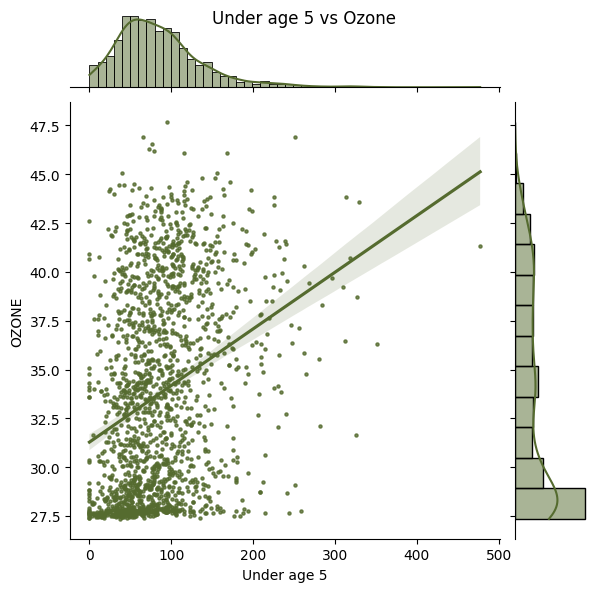

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'UNDER5', y='OZONE', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Under age 5', ylabel = 'OZONE')
scatter_plot.fig.suptitle("Under age 5 vs Ozone")

Text(0.5, 1, 'Less than HS education vs RMP facility proximity')

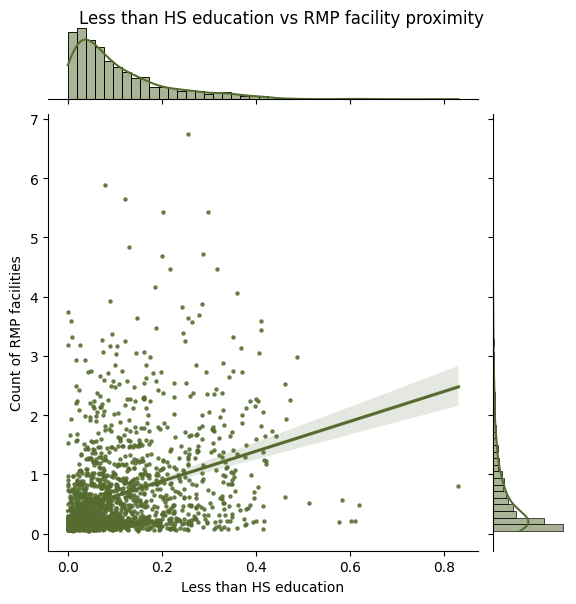

In [ ]:
scatter_plot = sns.jointplot(data=tractejdata, x= 'LESSHSPCT', y='PRMP', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Less than HS education', ylabel = 'Count of RMP facilities')
scatter_plot.fig.suptitle("Less than HS education vs RMP facility proximity", y = 1)

High (ish) correlations between variables before removing outliers

Correlation between ACSTOTPOP and OZONE:  0.3400891335167833
Correlation between ACSIPOVBAS and OZONE:  0.3499047352881966
Correlation between MINORPOP and PRMP:  0.28330738821271123
Correlation between MINORPOP and OZONE:  0.2884927587415456
Correlation between MINORPCT and PRMP:  0.36795587803327456
Correlation between LOWINCOME and PRMP:  0.2938948835332504
Correlation between LOWINCPCT and PRMP:  0.2663264654074377
Correlation between LOWINCPCT and UST:  0.2648702749740446
Correlation between LESSHS and PRMP:  0.2830838730114803
Correlation between LESSHSPCT and PRMP:  0.3297513338527352
Correlation between LINGISO and PTSDF:  0.2540945387676197
Correlation between UNDER5 and OZONE:  0.29455746589001247

In [ ]:
ejdata.columns.values

array(['OBJECTID', 'ID', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION',
       'ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS', 'ACSTOTHH', 'ACSTOTHU',
       'ACSUNEMPBAS', 'VULEOPCT', 'MINORPOP', 'MINORPCT', 'LOWINCOME',
       'LOWINCPCT', 'UNEMPLOYED', 'UNEMPPCT', 'LINGISO', 'LINGISOPCT',
       'LESSHS', 'LESSHSPCT', 'UNDER5', 'UNDER5PCT', 'OVER64',
       'OVER64PCT', 'PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'PTRAF',
       'PRE1960', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS',
       'D_PM25_2', 'D_OZONE_2', 'D_DSLPM_2', 'D_CANCR_2', 'D_RESP_2',
       'D_PTRAF_2', 'D_LDPNT_2', 'D_PNPL_2', 'D_PRMP_2', 'D_PTSDF_2',
       'D_UST_2', 'D_PWDIS_2', 'P_VULEOPCT', 'P_MINORPCT', 'P_LWINCPCT',
       'P_UNEMPPCT', 'P_LNGISPCT', 'P_LESHSPCT', 'P_UNDR5PCT',
       'P_OVR64PCT', 'P_PM25', 'P_OZONE', 'P_DSLPM', 'P_CANCR', 'P_RESP',
       'P_PTRAF', 'P_LDPNT', 'P_PNPL', 'P_PRMP', 'P_PTSDF', 'P_UST',
       'P_PWDIS', 'P_PM25_D2', 'P_OZONE_D2', 'P_DSLPM_D2', 'P_CANCR_D2',
       'P_

In [ ]:
# tried to compute the correlation between the demographic and nbs factor for each track, but realized that there were not enough data points in each tract
# the output of this cell is the data points per chat, 
def census_exploration(data, dem_factor, nbs_factor): 
    new_column = f"corr between {dem_factor} and {nbs_factor}"
    grouped = data.groupby("Census_Tract").apply(lambda row: len(row[dem_factor]))
    #data[new_column] = data.apply(lambda row: np.corrcoef(row[dem_factor], row[nbs_factor]), axis = 1)
    print(grouped)

census_exploration(ejdata, 'ACSTOTPOP', 'OZONE')

Census_Tract
6001400100    2
6001400200    2
6001400300    4
6001400400    3
6001400500    3
             ..
6097154305    3
6097154306    2
6097154307    1
6097154308    1
6097990100    1
Length: 1772, dtype: int64


In [27]:
#looking at the things Carrie wants us to look at 
# % people of color; % low income; % less than highschool ed; % limited English speaking; % under age 5; % over 64

'LESSHSPCT'

In [ ]:
climate_risk_additional_variables = ["D_LDPNT_2", "D_DSLPM_2", "D_CANCR_2", "D_RESP_2", "D_PTRAF_2", "D_PWDIS_2", "D_PNPL_2", "D_PRMP_2", "PTSDF_2", "D_OZONE_2", "D_PM25_5", "D_UST_2"]

## Conclusions

The factors with the highest correlations were:

1. 0.368 - Minority Percentage VS Count of RMP (potential chemical accident management plan) facilities within 5km

undefined. 0.340 - Total Population VS Amount of Ozone

undefined. 0.330 - Percentage of People with less than HS Education VS Count of RMP facilities within 5km

undefined. 0.254 - Limited English Speaking People VS Hazardous Waste Proximity

undefined.  0.266 - Low Income Percentage VS Count of RMP facilities within 5km

undefined. 0.265 - Low Income Percentage VS Underground Storage Tanks

## SECOND PERSPECTIVE: NBS (Bay Area Greenprint)

### Merging Census Tract Data

In [ ]:
api_data = pd.read_csv("bay_area_tracts_cleaned.csv")
api_data.head()

,census_tract,carbon_urbanforest_value,floodplain100_value,floodplain500_value,floodplain500_natural_value,waterqualityindex_value,drinkingwater_value,reservoir_value,hirechargevulnerable_value,waterbasin_value,...,watersites_existing_value,protected_fee_value,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value
0,6001451704,11922,0,0,0,lower than average,0,False,426,False,...,0,21,0,0,0,0,0,0,0,0
1,6001428301,12630,151,231,27,lower than average,0,False,0,False,...,0,26,0,0,0,0,0,3,7,29
2,6001407000,2085,0,0,0,lower than average,0,False,0,False,...,0,2,0,0,0,0,0,213,212,0
3,6001422400,2643,0,0,0,lower than average,0,False,0,False,...,0,1,0,0,0,0,0,0,0,0
4,6001423200,2686,0,0,0,lower than average,0,False,0,False,...,0,0,0,0,0,0,0,0,112,0


In [ ]:
join_ej = tractejdata.copy().reset_index()
join_ej

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,P_UST_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,VULEOPCTSUP,P_VULEOPCTSUP,Shape_Length,Shape_Area
0,6001400100,11497.5,6.001400e+10,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,...,0.00,0.00,3.472928e+06,0.00,0.0,0.00,0.045985,4.500000,12394.863162,5.582015e+06
1,6001400200,11499.5,6.001400e+10,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,...,61.00,0.00,2.932800e+05,0.00,0.0,0.00,0.065066,14.000000,3897.634468,4.711386e+05
2,6001400300,11502.5,6.001400e+10,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,...,44.50,1.25,2.777100e+05,0.00,0.0,0.00,0.068939,17.500000,3585.213907,4.460350e+05
3,6001400400,11506.0,6.001400e+10,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,...,73.00,0.00,2.387127e+05,0.00,0.0,0.00,0.082872,24.000000,2764.220329,3.834810e+05
4,6001400500,11509.0,6.001401e+10,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,...,77.00,3.00,1.971413e+05,0.00,0.0,0.00,0.096649,31.666667,2393.621286,3.167009e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,6097154100,35583.5,6.097154e+10,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,...,6.50,0.00,1.449154e+08,107005.75,0.0,0.50,0.093342,30.000000,85895.936020,2.386545e+08
1752,6097154201,35587.5,6.097154e+10,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,...,66.50,1.25,6.669210e+06,4638.75,0.0,0.00,0.175306,66.750000,15475.588295,1.100837e+07
1753,6097154202,35591.5,6.097154e+10,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,...,39.75,0.00,4.368555e+07,3750229.25,0.0,0.25,0.094953,30.750000,46077.736490,7.817077e+07
1754,6097154304,35595.5,6.097154e+10,9.0,581.750000,564.000000,435.750000,249.000000,443.00,291.000000,...,10.00,0.00,2.221400e+08,4218582.75,0.0,0.25,0.105745,36.250000,100030.432781,3.714974e+08


In [ ]:
data_master = join_ej.merge(api_data, left_on= "Census_Tract", right_on= "census_tract")
data_master

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,watersites_existing_value,protected_fee_value,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value
0,6001400100,11497.5,6.001400e+10,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,...,0,299,0,135,529,305,515,0,0,0
1,6001400200,11499.5,6.001400e+10,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,...,0,0,0,0,0,0,0,0,0,0
2,6001400300,11502.5,6.001400e+10,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,...,0,1,0,0,0,0,0,1,1,0
3,6001400400,11506.0,6.001400e+10,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,...,0,0,0,0,0,0,0,178,0,0
4,6001400500,11509.0,6.001401e+10,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,...,0,8,0,0,0,0,0,146,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6097154100,35583.5,6.097154e+10,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,...,0,10001,40900,28065,30859,0,81194,0,0,0
1751,6097154201,35587.5,6.097154e+10,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,...,0,73,1752,655,56,0,1685,0,0,0
1752,6097154202,35591.5,6.097154e+10,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,...,0,11993,16351,17266,3606,33693,10640,0,0,0
1753,6097154304,35595.5,6.097154e+10,9.0,581.750000,564.000000,435.750000,249.000000,443.00,291.000000,...,0,45665,81066,105815,20722,26840,57564,0,27,0


Columns that Carrie identified as important in the API.

In [32]:
climate_risk_carrie = ['morewater_hotdry_value',
 'morewater_warmwet_value',
 'floodplain100_value',
 'floodplain500_value',
 'slr2050_value',
 'slr2100_value',
 'historicalfire_value',
 'wu_interface_value',
 'firehazard_value',
 'urbheatisland_air_value']


NBS = ['wetlands_value',
 'vernalpools_value',
 'naturalriver_value',
 'naturalbaylands_value',
 'hirechargevulnerable_value',
 'floodplain500_natural_value',
 'carbon_urbanforest_value',
 'drinkingwater_value',
 'reservoir_value',
 'waterbasin_value']

### Finding Correlations

Function to explore the data that takes in two factors (see photo above for column names) and compares them

In [33]:

def exploration_api(data, dem_factor, nbs_factor): 
    corr = np.corrcoef(data_master[dem_factor], data_master[nbs_factor])[0][1]
    if (corr >= 0.15 or corr < -0.15):
        print(f"Correlation between {dem_factor} and {nbs_factor}: ", corr) 

        # plt.subplot(2, 1, 1)
        # plt.plot(x1, y1, 'ko-')
        # plt.title('A tale of 2 subplots')
        # plt.ylabel('Damped oscillation')


        # plt.subplot(2, 1, 2)
        # plt.plot(x2, y2, 'r.-')
        # plt.xlabel('time (s)')
        # plt.ylabel('Undamped') 
        try:
            x_limits = find_outliers(data, dem_factor)
            y_limits = find_outliers(data, nbs_factor)
        except:
            True==True
        #scatter_plot = sns.jointplot(data=data, x=dem_factor, y=nbs_factor, kind="reg", scatter_kws={'s':5}, xlim = (x_limits[0], x_limits[1]), ylim = (y_limits[0], y_limits[1]))
        #scatter_plot.fig.suptitle(f"Scatter plot of {dem_factor} vs {nbs_factor}")

        return corr  
    else:
        return


In [ ]:
sea_level_rise = demographics + ['slr2100_value', 'slr2050_value']

Text(0.5, 0.98, 'Population in Poverty vs Urban Heat Island Air Value')

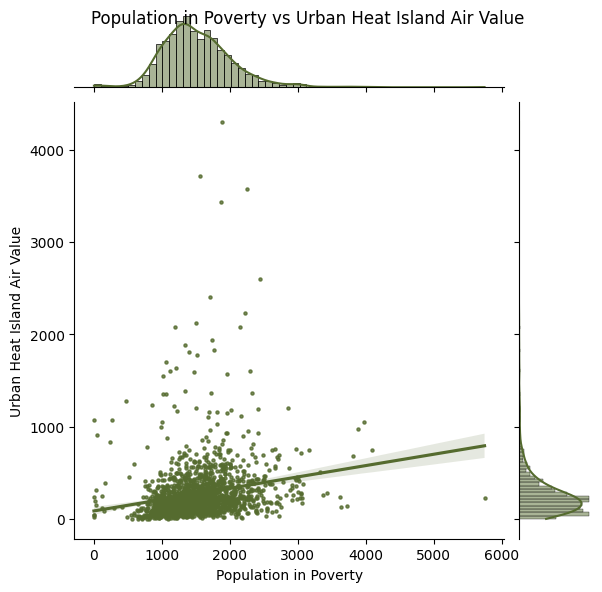

In [ ]:
scatter_plot = sns.jointplot(data=data_master, x= 'ACSIPOVBAS', y='urbheatisland_air_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Population in Poverty', ylabel = 'Urban Heat Island Air Value')
scatter_plot.fig.suptitle("Population in Poverty vs Urban Heat Island Air Value") 

The hidden code cells is when I tried to combine prompts 1 and 2 with prompt 4 by looking into access to NBS solutions for the top 25% highest combined scores. These code cells are hidden because I manually copied the top 25%  (over 300) census tracts into the analysis. Created the same visualizations as the visualizations above

Text(0.5, 1, 'Population in Poverty in Census Tracts with Highest Combined Score vs Urban Heat Island Air Value')

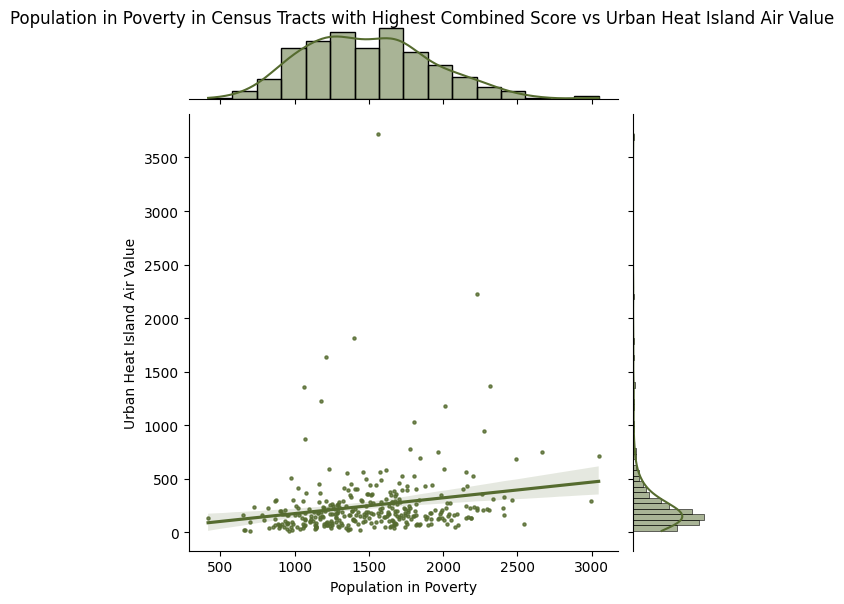

In [ ]:
#trying smth
highest_at_risk_census_tracts = [6001407300,
 6001408800,
 6001403000,
 6001406100,
 6001409500,
 6001402200,
 6001402500,
 6001408900,
 6001406000,
 6001410500,
 6013375000,
 6075023200,
 6001401800,
 6013376000,
 6001409400,
 6001401600,
 6013379000,
 6001406201,
 6001407500,
 6001407200,
 6001401300,
 6001401700,
 6001402600,
 6081602100,
 6013368001,
 6001401400,
 6075023300,
 6001401500,
 6075012502,
 6001409200,
 6001407400,
 6075061200,
 6013377000,
 6001405901,
 6001403100,
 6001406202,
 6075023400,
 6075023001,
 6001405402,
 6013312000,
 6081610201,
 6001432501,
 6001402700,
 6001402900,
 6013381000,
 6075012301,
 6095251802,
 6085503601,
 6001405902,
 6095250900,
 6075025702,
 6075026403,
 6081610202,
 6013366002,
 6085501501,
 6001400900,
 6001405401,
 6013373000,
 6013307202,
 6085503712,
 6001436200,
 6081610203,
 6085503110,
 6001405302,
 6001428700,
 6001402400,
 6013368002,
 6075026404,
 6001409000,
 6075018000,
 6013310000,
 6085500902,
 6013311000,
 6075023003,
 6085503710,
 6075017700,
 6001425101,
 6013382000,
 6085512603,
 6001438300,
 6001409300,
 6075023102,
 6081610500,
 6085503113,
 6001427600,
 6075026402,
 6001437300,
 6075026401,
 6085503112,
 6001401000,
 6001425102,
 6001433900,
 6001431000,
 6075017801,
 6001436800,
 6095250701,
 6085503117,
 6075012302,
 6075011300,
 6001408600,
 6085500901,
 6001400800,
 6001424002,
 6075020900,
 6001438400,
 6001408700,
 6085503602,
 6001409600,
 6075022802,
 6001407102,
 6001410400,
 6001410300,
 6013372000,
 6013371000,
 6001433103,
 6001407101,
 6001436900,
 6001406500,
 6001435601,
 6001437400,
 6001400700,
 6085503218,
 6001408500,
 6075012202,
 6095252502,
 6001438201,
 6013374000,
 6001401100,
 6075025800,
 6085503402,
 6001437102,
 6085503711,
 6001407000,
 6001435500,
 6085501401,
 6001405700,
 6085501402,
 6075011700,
 6095251000,
 6075022901,
 6001406300,
 6001434000,
 6001437702,
 6001433200,
 6001433700,
 6001432400,
 6001405500,
 6075010600,
 6001436602,
 6075022903,
 6001433104,
 6001437900,
 6085501502,
 6001437701,
 6075022801,
 6001432502,
 6001425104,
 6001440200,
 6013306004,
 6013309000,
 6081600600,
 6095251100,
 6001437000,
 6013369001,
 6001427200,
 6075022902,
 6013365002,
 6085501700,
 6001433300,
 6095251200,
 6001436700,
 6085503707,
 6085503401,
 6085500100,
 6075026100,
 6001406602,
 6001405301,
 6085503713,
 6001422100,
 6075012100,
 6001405800,
 6075060502,
 6001437500,
 6013366001,
 6013367200,
 6085503111,
 6001436601,
 6001410100,
 6001433600,
 6013313206,
 6095251500,
 6001433102,
 6001423300,
 6085512604,
 6001425103,
 6081607701,
 6081606000,
 6001437600,
 6085503703,
 6001438204,
 6081610100,
 6081600800,
 6085503123,
 6095251600,
 6001433000,
 6075011200,
 6075016802,
 6085501000,
 6085503507,
 6001403600,
 6013313102,
 6001403501,
 6001406601,
 6013386000,
 6081607702,
 6013387000,
 6001436100,
 6013307102,
 6081610400,
 6075022803,
 6013328000,
 6001435900,
 6001422000,
 6001435400,
 6075016000,
 6001406400,
 6013313205,
 6085501102,
 6075031202,
 6085503709,
 6013383000,
 6013389200,
 6085503217,
 6085503121,
 6075010800,
 6001432300,
 6085503306,
 6075016200,
 6001400600,
 6085504413,
 6085501101,
 6001409700,
 6001435700,
 6001433500,
 6001427300,
 6001444500,
 6001437200,
 6075011901,
 6095251902,
 6081604200,
 6085504805,
 6001440331,
 6085504002,
 6085508900,
 6085512043,
 6001403502,
 6085503903,
 6075025701,
 6013306003,
 6085504318,
 6001405600,
 6001420500,
 6001442800,
 6095252607,
 6075026301,
 6085501200,
 6013314200,
 6001438100,
 6001423100,
 6085512310,
 6013314103,
 6075031201,
 6001444601,
 6081611800,
 6013305000,
 6085500800,
 6013336101,
 6075026004,
 6013336202,
 6001432700,
 6075011902,
 6013370000,
 6081600200,
 6085503510,
 6075026001,
 6085503105,
 6085502002,
 6001422200,
 6097153104,
 6085503504,
 6085504422,
 6081610601,
 6075025402,
 6075022600,
 6013302005,
 6013389100,
 6081606300,
 6075010500,
 6075015801,
 6001424001,
 6075033204,
 6001443001,
 6013314102,
 6075015500,
 6001430900,
 6085503337,
 6001438203,
 6081602300,
 6085503122,
 6085503211,
 6081610800,
 6001440333,
 6055201003,
 6085504802,
 6001423901,
 6075042700,
 6085505301,
 6085503506,
 6075047902,
 6013307205,
 6085503511,
 6075061000,
 6001435602,
 6075015100,
 6075042601,
 6075031301,
 6085504410,
 6001403701,
 6085504806,
 6081600402,
 6075047701,
 6013336201]
oakland = data_master[data_master["Census_Tract"].isin(highest_at_risk_census_tracts)]
scatter_plot = sns.jointplot(data=oakland, x= 'ACSIPOVBAS', y='urbheatisland_air_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Population in Poverty', ylabel = 'Urban Heat Island Air Value')
scatter_plot.fig.suptitle("Population in Poverty in Census Tracts with Highest Combined Score vs Urban Heat Island Air Value", y = 1) 

Text(0.5, 1.05, 'Minority Percentile with Highest Combined Score vs Wildland-urban Interface')

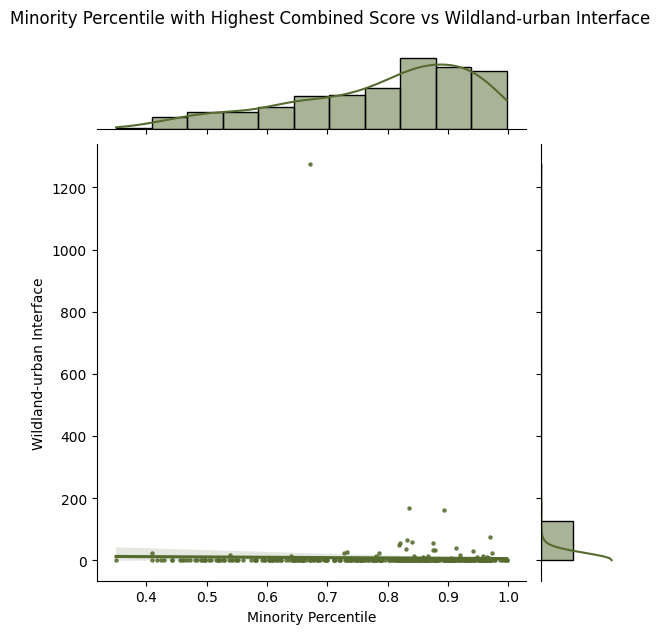

In [ ]:
#trying smth
highest_at_risk_census_tracts = [6001407300,
 6001408800,
 6001403000,
 6001406100,
 6001409500,
 6001402200,
 6001402500,
 6001408900,
 6001406000,
 6001410500,
 6013375000,
 6075023200,
 6001401800,
 6013376000,
 6001409400,
 6001401600,
 6013379000,
 6001406201,
 6001407500,
 6001407200,
 6001401300,
 6001401700,
 6001402600,
 6081602100,
 6013368001,
 6001401400,
 6075023300,
 6001401500,
 6075012502,
 6001409200,
 6001407400,
 6075061200,
 6013377000,
 6001405901,
 6001403100,
 6001406202,
 6075023400,
 6075023001,
 6001405402,
 6013312000,
 6081610201,
 6001432501,
 6001402700,
 6001402900,
 6013381000,
 6075012301,
 6095251802,
 6085503601,
 6001405902,
 6095250900,
 6075025702,
 6075026403,
 6081610202,
 6013366002,
 6085501501,
 6001400900,
 6001405401,
 6013373000,
 6013307202,
 6085503712,
 6001436200,
 6081610203,
 6085503110,
 6001405302,
 6001428700,
 6001402400,
 6013368002,
 6075026404,
 6001409000,
 6075018000,
 6013310000,
 6085500902,
 6013311000,
 6075023003,
 6085503710,
 6075017700,
 6001425101,
 6013382000,
 6085512603,
 6001438300,
 6001409300,
 6075023102,
 6081610500,
 6085503113,
 6001427600,
 6075026402,
 6001437300,
 6075026401,
 6085503112,
 6001401000,
 6001425102,
 6001433900,
 6001431000,
 6075017801,
 6001436800,
 6095250701,
 6085503117,
 6075012302,
 6075011300,
 6001408600,
 6085500901,
 6001400800,
 6001424002,
 6075020900,
 6001438400,
 6001408700,
 6085503602,
 6001409600,
 6075022802,
 6001407102,
 6001410400,
 6001410300,
 6013372000,
 6013371000,
 6001433103,
 6001407101,
 6001436900,
 6001406500,
 6001435601,
 6001437400,
 6001400700,
 6085503218,
 6001408500,
 6075012202,
 6095252502,
 6001438201,
 6013374000,
 6001401100,
 6075025800,
 6085503402,
 6001437102,
 6085503711,
 6001407000,
 6001435500,
 6085501401,
 6001405700,
 6085501402,
 6075011700,
 6095251000,
 6075022901,
 6001406300,
 6001434000,
 6001437702,
 6001433200,
 6001433700,
 6001432400,
 6001405500,
 6075010600,
 6001436602,
 6075022903,
 6001433104,
 6001437900,
 6085501502,
 6001437701,
 6075022801,
 6001432502,
 6001425104,
 6001440200,
 6013306004,
 6013309000,
 6081600600,
 6095251100,
 6001437000,
 6013369001,
 6001427200,
 6075022902,
 6013365002,
 6085501700,
 6001433300,
 6095251200,
 6001436700,
 6085503707,
 6085503401,
 6085500100,
 6075026100,
 6001406602,
 6001405301,
 6085503713,
 6001422100,
 6075012100,
 6001405800,
 6075060502,
 6001437500,
 6013366001,
 6013367200,
 6085503111,
 6001436601,
 6001410100,
 6001433600,
 6013313206,
 6095251500,
 6001433102,
 6001423300,
 6085512604,
 6001425103,
 6081607701,
 6081606000,
 6001437600,
 6085503703,
 6001438204,
 6081610100,
 6081600800,
 6085503123,
 6095251600,
 6001433000,
 6075011200,
 6075016802,
 6085501000,
 6085503507,
 6001403600,
 6013313102,
 6001403501,
 6001406601,
 6013386000,
 6081607702,
 6013387000,
 6001436100,
 6013307102,
 6081610400,
 6075022803,
 6013328000,
 6001435900,
 6001422000,
 6001435400,
 6075016000,
 6001406400,
 6013313205,
 6085501102,
 6075031202,
 6085503709,
 6013383000,
 6013389200,
 6085503217,
 6085503121,
 6075010800,
 6001432300,
 6085503306,
 6075016200,
 6001400600,
 6085504413,
 6085501101,
 6001409700,
 6001435700,
 6001433500,
 6001427300,
 6001444500,
 6001437200,
 6075011901,
 6095251902,
 6081604200,
 6085504805,
 6001440331,
 6085504002,
 6085508900,
 6085512043,
 6001403502,
 6085503903,
 6075025701,
 6013306003,
 6085504318,
 6001405600,
 6001420500,
 6001442800,
 6095252607,
 6075026301,
 6085501200,
 6013314200,
 6001438100,
 6001423100,
 6085512310,
 6013314103,
 6075031201,
 6001444601,
 6081611800,
 6013305000,
 6085500800,
 6013336101,
 6075026004,
 6013336202,
 6001432700,
 6075011902,
 6013370000,
 6081600200,
 6085503510,
 6075026001,
 6085503105,
 6085502002,
 6001422200,
 6097153104,
 6085503504,
 6085504422,
 6081610601,
 6075025402,
 6075022600,
 6013302005,
 6013389100,
 6081606300,
 6075010500,
 6075015801,
 6001424001,
 6075033204,
 6001443001,
 6013314102,
 6075015500,
 6001430900,
 6085503337,
 6001438203,
 6081602300,
 6085503122,
 6085503211,
 6081610800,
 6001440333,
 6055201003,
 6085504802,
 6001423901,
 6075042700,
 6085505301,
 6085503506,
 6075047902,
 6013307205,
 6085503511,
 6075061000,
 6001435602,
 6075015100,
 6075042601,
 6075031301,
 6085504410,
 6001403701,
 6085504806,
 6081600402,
 6075047701,
 6013336201]
oakland = data_master[data_master["Census_Tract"].isin(highest_at_risk_census_tracts)]
scatter_plot = sns.jointplot(data=oakland, x= 'MINORPCT', y='wu_interface_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Minority Percentile', ylabel = 'Wildland-urban Interface')
scatter_plot.fig.suptitle("Minority Percentile with Highest Combined Score vs Wildland-urban Interface", y = 1.05) 

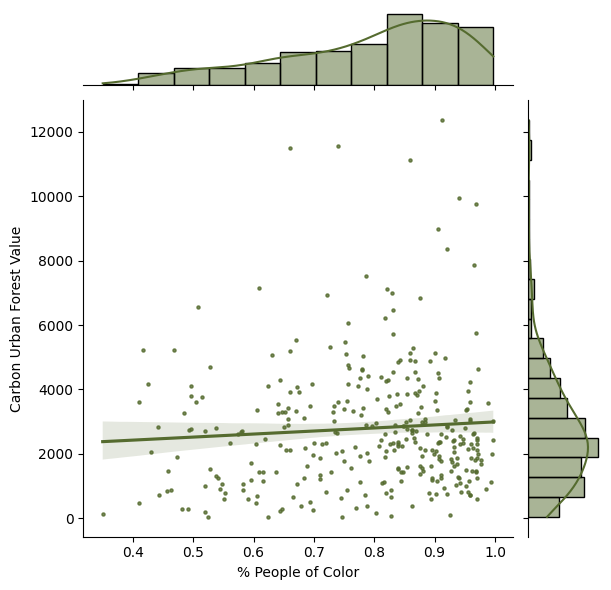

In [ ]:
#trying smth
highest_at_risk_census_tracts = [6001407300,
 6001408800,
 6001403000,
 6001406100,
 6001409500,
 6001402200,
 6001402500,
 6001408900,
 6001406000,
 6001410500,
 6013375000,
 6075023200,
 6001401800,
 6013376000,
 6001409400,
 6001401600,
 6013379000,
 6001406201,
 6001407500,
 6001407200,
 6001401300,
 6001401700,
 6001402600,
 6081602100,
 6013368001,
 6001401400,
 6075023300,
 6001401500,
 6075012502,
 6001409200,
 6001407400,
 6075061200,
 6013377000,
 6001405901,
 6001403100,
 6001406202,
 6075023400,
 6075023001,
 6001405402,
 6013312000,
 6081610201,
 6001432501,
 6001402700,
 6001402900,
 6013381000,
 6075012301,
 6095251802,
 6085503601,
 6001405902,
 6095250900,
 6075025702,
 6075026403,
 6081610202,
 6013366002,
 6085501501,
 6001400900,
 6001405401,
 6013373000,
 6013307202,
 6085503712,
 6001436200,
 6081610203,
 6085503110,
 6001405302,
 6001428700,
 6001402400,
 6013368002,
 6075026404,
 6001409000,
 6075018000,
 6013310000,
 6085500902,
 6013311000,
 6075023003,
 6085503710,
 6075017700,
 6001425101,
 6013382000,
 6085512603,
 6001438300,
 6001409300,
 6075023102,
 6081610500,
 6085503113,
 6001427600,
 6075026402,
 6001437300,
 6075026401,
 6085503112,
 6001401000,
 6001425102,
 6001433900,
 6001431000,
 6075017801,
 6001436800,
 6095250701,
 6085503117,
 6075012302,
 6075011300,
 6001408600,
 6085500901,
 6001400800,
 6001424002,
 6075020900,
 6001438400,
 6001408700,
 6085503602,
 6001409600,
 6075022802,
 6001407102,
 6001410400,
 6001410300,
 6013372000,
 6013371000,
 6001433103,
 6001407101,
 6001436900,
 6001406500,
 6001435601,
 6001437400,
 6001400700,
 6085503218,
 6001408500,
 6075012202,
 6095252502,
 6001438201,
 6013374000,
 6001401100,
 6075025800,
 6085503402,
 6001437102,
 6085503711,
 6001407000,
 6001435500,
 6085501401,
 6001405700,
 6085501402,
 6075011700,
 6095251000,
 6075022901,
 6001406300,
 6001434000,
 6001437702,
 6001433200,
 6001433700,
 6001432400,
 6001405500,
 6075010600,
 6001436602,
 6075022903,
 6001433104,
 6001437900,
 6085501502,
 6001437701,
 6075022801,
 6001432502,
 6001425104,
 6001440200,
 6013306004,
 6013309000,
 6081600600,
 6095251100,
 6001437000,
 6013369001,
 6001427200,
 6075022902,
 6013365002,
 6085501700,
 6001433300,
 6095251200,
 6001436700,
 6085503707,
 6085503401,
 6085500100,
 6075026100,
 6001406602,
 6001405301,
 6085503713,
 6001422100,
 6075012100,
 6001405800,
 6075060502,
 6001437500,
 6013366001,
 6013367200,
 6085503111,
 6001436601,
 6001410100,
 6001433600,
 6013313206,
 6095251500,
 6001433102,
 6001423300,
 6085512604,
 6001425103,
 6081607701,
 6081606000,
 6001437600,
 6085503703,
 6001438204,
 6081610100,
 6081600800,
 6085503123,
 6095251600,
 6001433000,
 6075011200,
 6075016802,
 6085501000,
 6085503507,
 6001403600,
 6013313102,
 6001403501,
 6001406601,
 6013386000,
 6081607702,
 6013387000,
 6001436100,
 6013307102,
 6081610400,
 6075022803,
 6013328000,
 6001435900,
 6001422000,
 6001435400,
 6075016000,
 6001406400,
 6013313205,
 6085501102,
 6075031202,
 6085503709,
 6013383000,
 6013389200,
 6085503217,
 6085503121,
 6075010800,
 6001432300,
 6085503306,
 6075016200,
 6001400600,
 6085504413,
 6085501101,
 6001409700,
 6001435700,
 6001433500,
 6001427300,
 6001444500,
 6001437200,
 6075011901,
 6095251902,
 6081604200,
 6085504805,
 6001440331,
 6085504002,
 6085508900,
 6085512043,
 6001403502,
 6085503903,
 6075025701,
 6013306003,
 6085504318,
 6001405600,
 6001420500,
 6001442800,
 6095252607,
 6075026301,
 6085501200,
 6013314200,
 6001438100,
 6001423100,
 6085512310,
 6013314103,
 6075031201,
 6001444601,
 6081611800,
 6013305000,
 6085500800,
 6013336101,
 6075026004,
 6013336202,
 6001432700,
 6075011902,
 6013370000,
 6081600200,
 6085503510,
 6075026001,
 6085503105,
 6085502002,
 6001422200,
 6097153104,
 6085503504,
 6085504422,
 6081610601,
 6075025402,
 6075022600,
 6013302005,
 6013389100,
 6081606300,
 6075010500,
 6075015801,
 6001424001,
 6075033204,
 6001443001,
 6013314102,
 6075015500,
 6001430900,
 6085503337,
 6001438203,
 6081602300,
 6085503122,
 6085503211,
 6081610800,
 6001440333,
 6055201003,
 6085504802,
 6001423901,
 6075042700,
 6085505301,
 6085503506,
 6075047902,
 6013307205,
 6085503511,
 6075061000,
 6001435602,
 6075015100,
 6075042601,
 6075031301,
 6085504410,
 6001403701,
 6085504806,
 6081600402,
 6075047701,
 6013336201]
oakland = data_master[data_master["Census_Tract"].isin(highest_at_risk_census_tracts)]
scatter_plot = sns.jointplot(data=oakland, x= 'MINORPCT', y='carbon_urbanforest_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = '% People of Color', ylabel = 'Carbon Urban Forest Value')

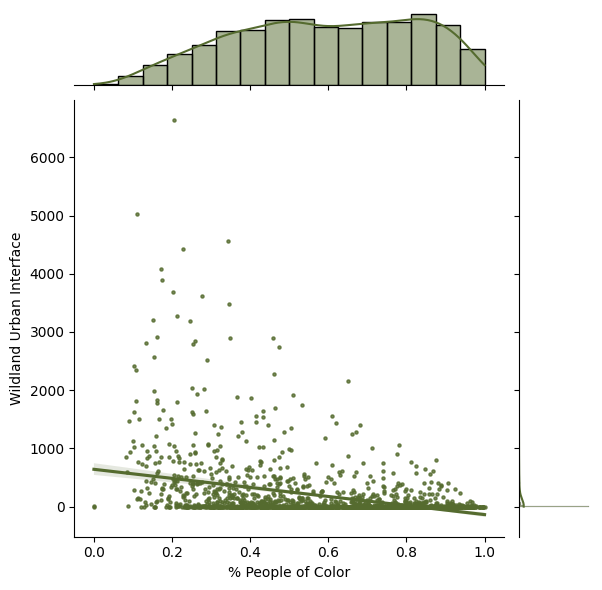

In [ ]:
scatter_plot = sns.jointplot(data=data_master, x= 'MINORPCT', y='wu_interface_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = '% People of Color', ylabel = 'Wildland Urban Interface')

In [ ]:
data_master[['urbheatisland_air_value']]

,urbheatisland_air_value
0,266
1,63
2,198
3,99
4,110
...,...
1750,154
1751,418
1752,458
1753,0


In [ ]:
def exploration(data, dem_factor, climate_risk): 
    #print(climate_risk)
    corr = np.corrcoef(data[dem_factor], data[climate_risk].fillna(0))[0][1]
    if corr > 0.1 or corr < -0.1:
        print(f"Correlation between {dem_factor} and {climate_risk}: ", corr) 
        return corr


for demo in demographics:
    corr = exploration(data_master, demo, 'urbheatisland_air_value')
        #print(corr)

Correlation between ACSTOTPOP and urbheatisland_air_value:  0.1906508735517468
Correlation between ACSIPOVBAS and urbheatisland_air_value:  0.204256725248026
Correlation between ACSEDUCBAS and urbheatisland_air_value:  0.1475737161475925
Correlation between ACSUNEMPBAS and urbheatisland_air_value:  0.1407195625083522
Correlation between UNDER5 and urbheatisland_air_value:  0.1774506804840069


In [ ]:
corrs = []

print('Sea Level Rise 2050')
for demo in demographics:
    corr = np.corrcoef(data_master[demo], data_master['slr2050_value'])[0][1]
    print(corr)

print('Sea Level Rise 2100')
for demo in demographics:
    corr = np.corrcoef(data_master[demo], data_master['slr2100_value'])[0][1]
    print(corr)

Sea Level Rise 2050
9.61506966802528e-05
0.002805129194804242
-0.004575186726558373
-0.011200551182879862
-0.007621760073756104
-0.01102556229218325
0.003987170616527604
0.011013427519168865
0.011067065742822832
-0.04047331150269326
-0.03688889918295387
0.008798640234993797
0.006311832690312356
0.01012924187788697
0.000734558789462575
0.011115158606087824
0.012107091454437028
Sea Level Rise 2100
0.0019010199795706092
0.005051647684706595
-0.0027114070742013286
-0.010851377311610023
-0.007318219582129487
-0.008651934579851748
0.009972905341426735
0.011601758900033817
0.01187939748769387
-0.03952173085957384
-0.0352274082040788
0.01172365878740444
0.008287642540572777
0.008552691633037946
-0.002714371834848542
0.014048735619061692
0.013750471875044018


In [ ]:
access_cols = ["protected_fee_value", "trailmilesexist_value", "pubrecland_value", "bikeroutes1_2_value", "bikeroutes1_value", "watersites_existing_value", "parkneed_value"]

for demo in demographics:
    for acc in access_cols:
        corr = exploration_api(data_master, demo, acc)

Correlation between displacement_typos_value and watersites_existing_value:  0.22834596850548802


Text(0.5, 1, 'watersites_existing_value vs displacement_typos_value')

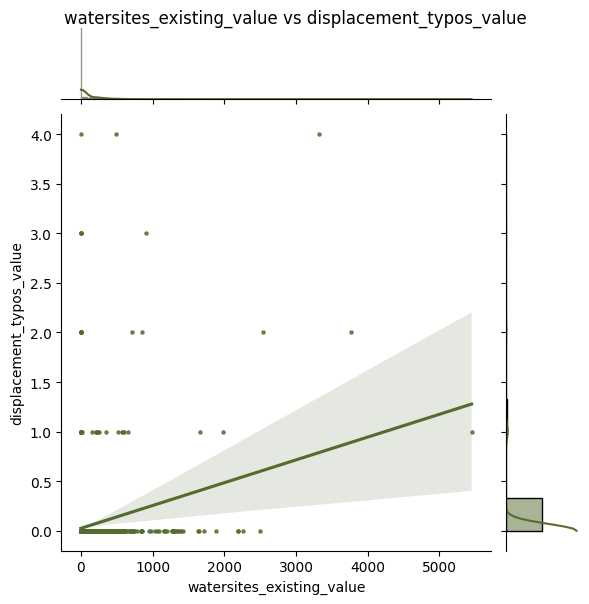

In [ ]:
more_compare = ['communityconcern_value', 'disadvcommunity_value', 'displacement_typos_value']

for more in more_compare:
    for acc in access_cols:
        corr = exploration_api(data_master, more, acc)

scatter_plot = sns.jointplot(data=data_master, x= 'displacement_typos_value', y='watersites_existing_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'watersites_existing_value', ylabel = 'displacement_typos_value')
scatter_plot.fig.suptitle("watersites_existing_value vs displacement_typos_value", y = 1)

In [ ]:
for acc in access_cols:
    for s in NBS:
        corr = exploration_api(data_master, acc, s)

Correlation between protected_fee_value and wetlands_value:  0.21582038259444242
Correlation between protected_fee_value and naturalriver_value:  0.7616805138287428
Correlation between protected_fee_value and floodplain500_natural_value:  0.22954569877937603
Correlation between protected_fee_value and drinkingwater_value:  0.6371964066046063
Correlation between protected_fee_value and reservoir_value:  0.3622256473915165
Correlation between trailmilesexist_value and naturalriver_value:  0.38012809362882866
Correlation between trailmilesexist_value and carbon_urbanforest_value:  0.17931917517792367
Correlation between trailmilesexist_value and drinkingwater_value:  0.2382663572761062
Correlation between trailmilesexist_value and reservoir_value:  0.30736902084761364
Correlation between pubrecland_value and wetlands_value:  0.1949334452160531
Correlation between pubrecland_value and naturalriver_value:  0.728482218987553
Correlation between pubrecland_value and floodplain500_natural_valu

In [ ]:
for demo in demographics:
    for s in NBS:
        corr = exploration_api(data_master, demo, s)

Correlation between MINORPCT and carbon_urbanforest_value:  -0.4327322799236715
Correlation between MINORPCT and reservoir_value:  -0.16563518092459065
Correlation between LOWINCPCT and carbon_urbanforest_value:  -0.26575474840509455
Correlation between LESSHSPCT and carbon_urbanforest_value:  -0.282273657118961
Correlation between LINGISO and carbon_urbanforest_value:  -0.24607233979540086
Correlation between LINGISOPCT and carbon_urbanforest_value:  -0.27449267144713296
Correlation between UNDER5PCT and carbon_urbanforest_value:  -0.15566397786199582
Correlation between OVER64 and vernalpools_value:  0.18276541716703512
Correlation between OVER64 and carbon_urbanforest_value:  0.31357120964163837
Correlation between OVER64PCT and naturalriver_value:  0.1508932185280221
Correlation between OVER64PCT and carbon_urbanforest_value:  0.32549225668988263


In [ ]:
arr = []

for demo in demographics:
    for r in climate_risk_carrie:
        corr = exploration_api(data_master, demo, r)
        arr = np.append(arr, corr)

arr

Correlation between ACSTOTPOP and urbheatisland_air_value:  0.1906508735517468
Correlation between ACSIPOVBAS and urbheatisland_air_value:  0.204256725248026
Correlation between MINORPCT and wu_interface_value:  -0.35728309978422024
Correlation between LOWINCPCT and wu_interface_value:  -0.17143517089146826
Correlation between LESSHSPCT and wu_interface_value:  -0.17801330376495425
Correlation between LINGISO and wu_interface_value:  -0.203273442750465
Correlation between LINGISOPCT and wu_interface_value:  -0.2253815779165792
Correlation between UNDER5 and urbheatisland_air_value:  0.1774506804840069
Correlation between UNDER5PCT and wu_interface_value:  -0.15355162303242037
Correlation between OVER64 and wu_interface_value:  0.23025350370447067
Correlation between OVER64PCT and wu_interface_value:  0.2933846157807538


array([None, None, None, None, None, None, None, None, None,
       0.1906508735517468, None, None, None, None, None, None, None, None,
       None, 0.204256725248026, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, -0.35728309978422024,
       None, None, None, None, None, None, None, None, None,
       -0.17143517089146826, None, None, None, None, None, None, None,
       None, None, -0.17801330376495425, None, None, None, None, None,
       None, None, None, None, -0.203273442750465, None, None, None, None,
       None, None, None, None, None, -0.2253815779165792, None, None,
       None, None, None, None, None, None, None, None, None,
       0.1774506804840069, None, None, None, None, None, None, None,
       -0.153551623032

## Conclusions before normalizing

Correlation between MINORPCT and carbon_urbanforest_value:  -0.4327322799236715
Correlation between LOWINCPCT and carbon_urbanforest_value:  -0.26575474840509455
Correlation between LESSHSPCT and carbon_urbanforest_value:  -0.282273657118961
Correlation between LINGISOPCT and carbon_urbanforest_value:  -0.27449267144713296


Correlation between OVER64 and carbon_urbanforest_value:  0.31357120964163837
Correlation between OVER64PCT and carbon_urbanforest_value:  0.32549225668988263

## Visualizing

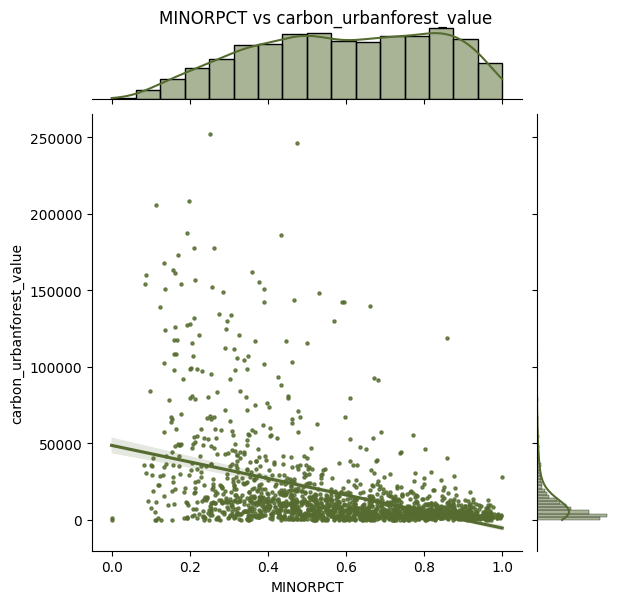

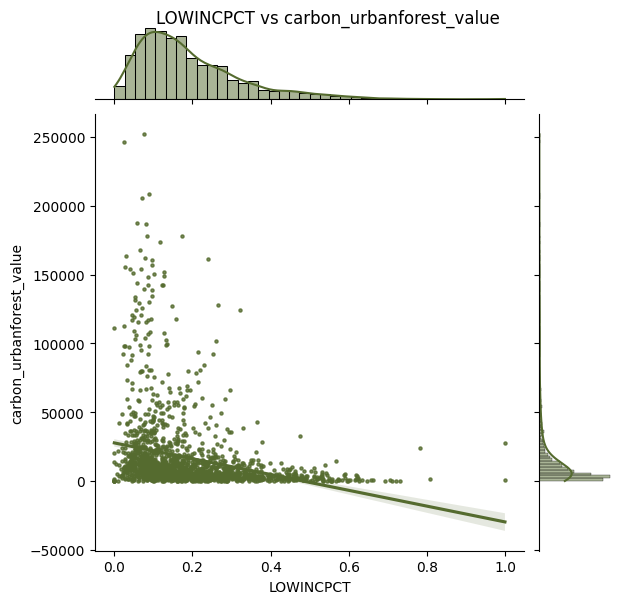

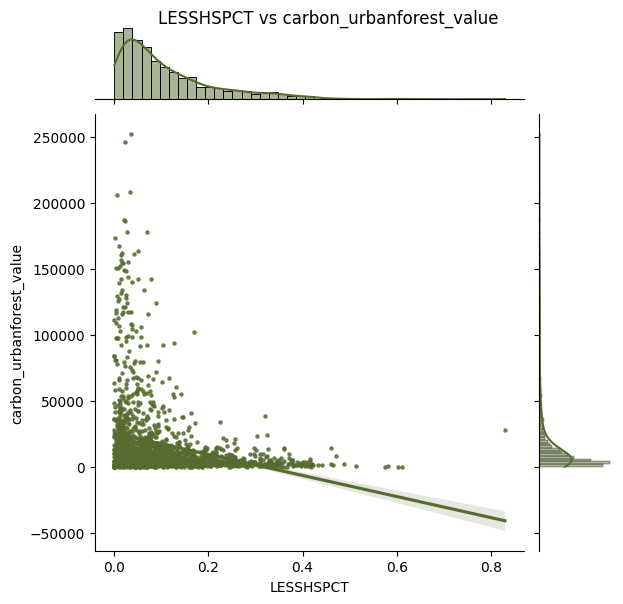

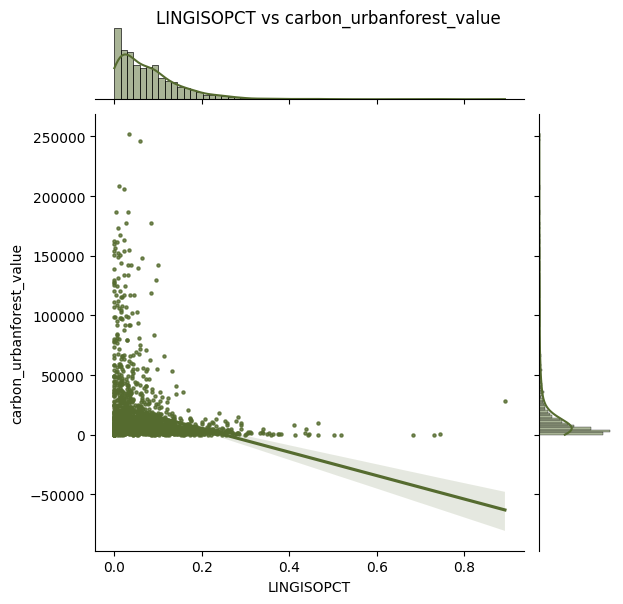

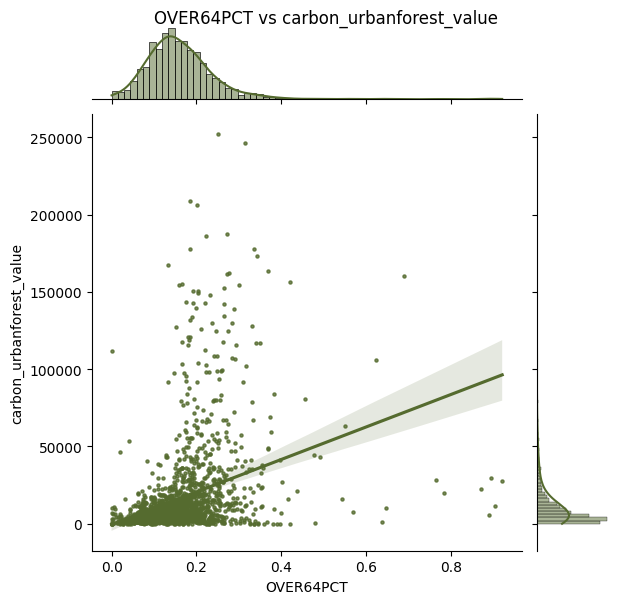

In [ ]:
corr_nbs = ['MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISOPCT', 'OVER64PCT']

for n in corr_nbs:
    scatter_plot = sns.jointplot(data=data_master, x= n, y='carbon_urbanforest_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
    scatter_plot.set_axis_labels(xlabel = n, ylabel = 'carbon_urbanforest_value')
    scatter_plot.fig.suptitle(n + " vs carbon_urbanforest_value", y = 1)

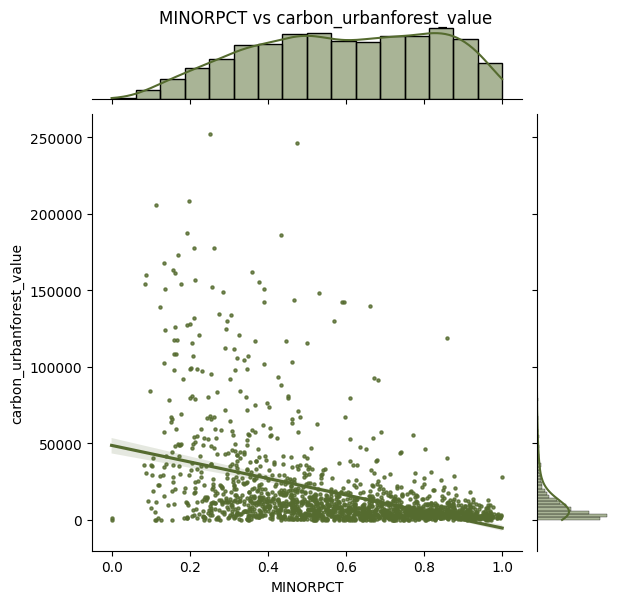

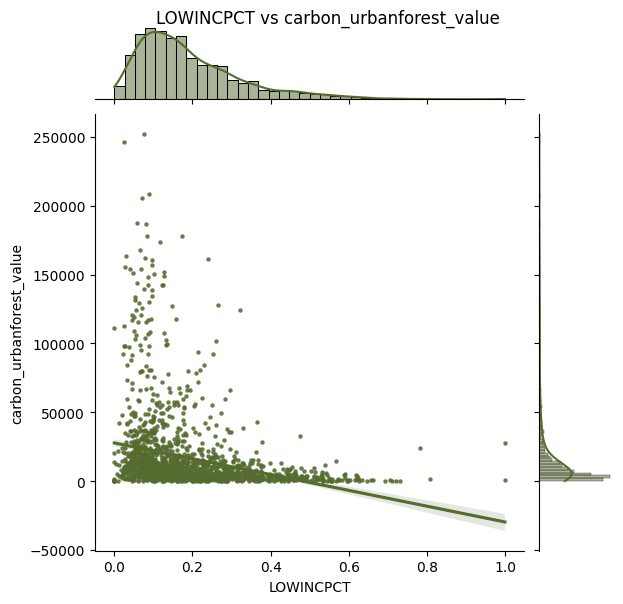

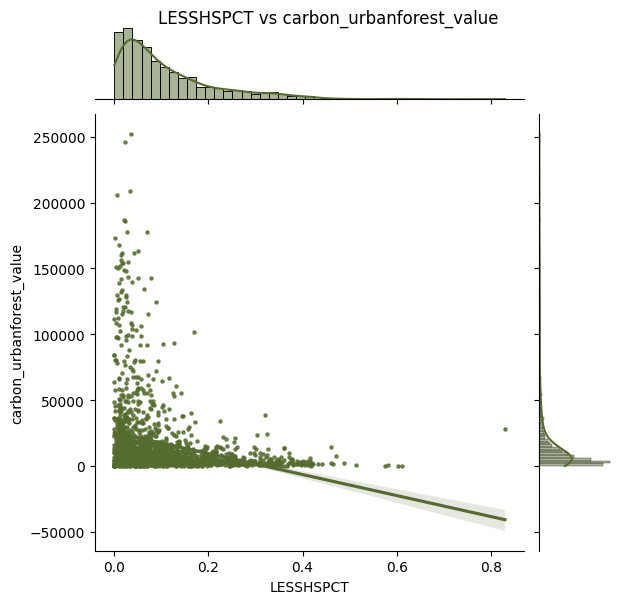

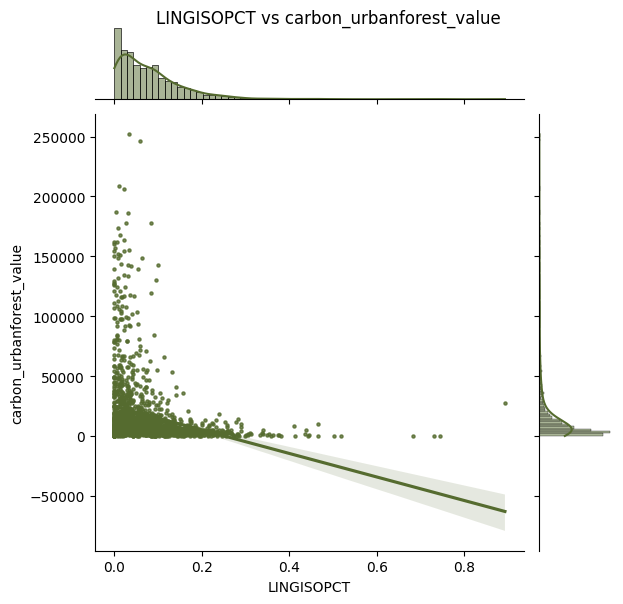

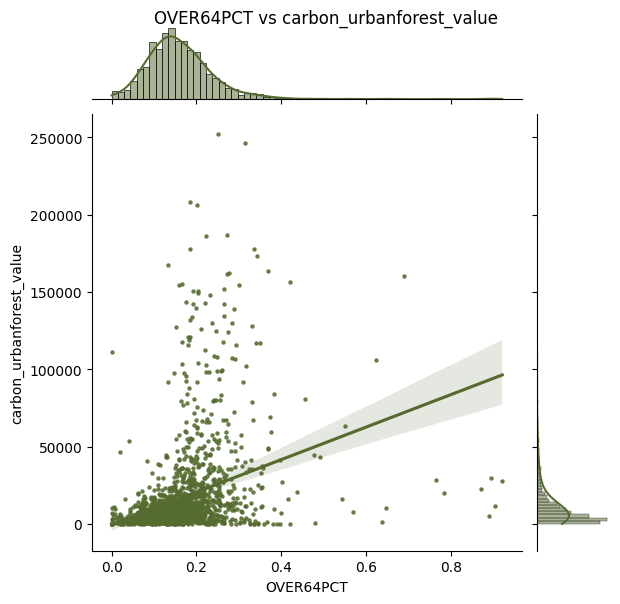

In [ ]:
corr_nbs = ['MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISOPCT', 'OVER64PCT']

for n in corr_nbs:
    scatter_plot = sns.jointplot(data=data_master, x= n, y='carbon_urbanforest_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
    scatter_plot.set_axis_labels(xlabel = n, ylabel = 'carbon_urbanforest_value')
    scatter_plot.fig.suptitle(n + " vs carbon_urbanforest_value", y = 1)

Text(0.5, 1, 'Less than HS education vs RMP facility proximity')

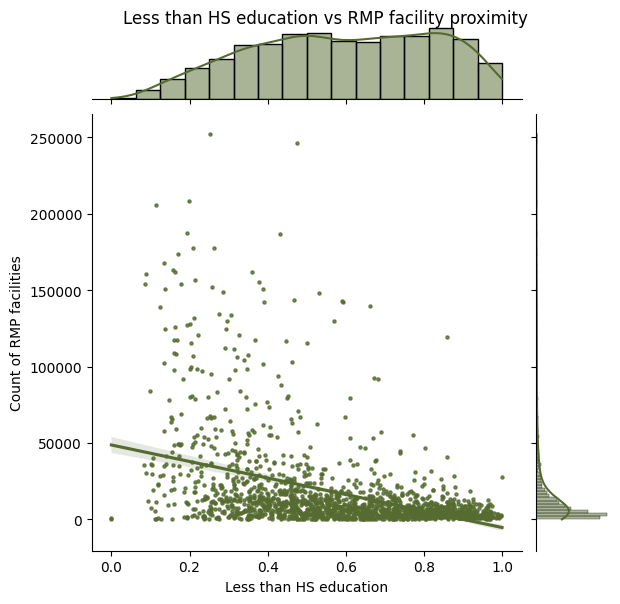

In [ ]:
scatter_plot = sns.jointplot(data=data_master, x= 'MINORPCT', y='carbon_urbanforest_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Less than HS education', ylabel = 'Count of RMP facilities')
scatter_plot.fig.suptitle("Less than HS education vs RMP facility proximity", y = 1)

Text(0.5, 1, 'Less than HS education vs RMP facility proximity')

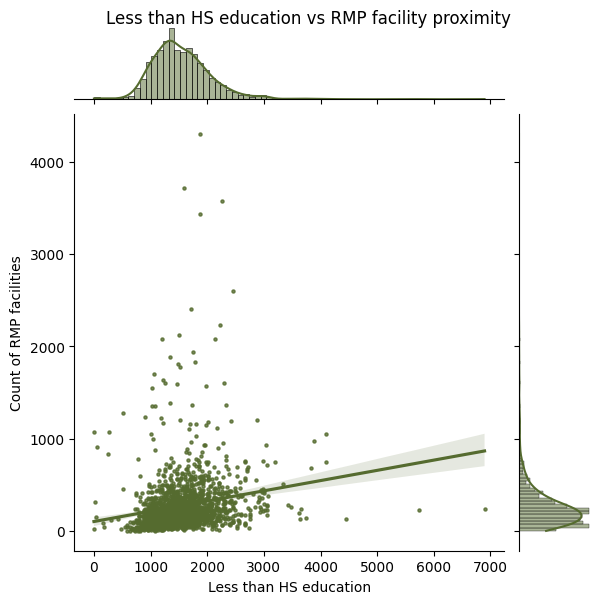

In [ ]:
scatter_plot = sns.jointplot(data=data_master, x= 'ACSTOTPOP', y='urbheatisland_air_value', kind="reg", scatter_kws={'s':5}, color='darkolivegreen')
scatter_plot.set_axis_labels(xlabel = 'Less than HS education', ylabel = 'Count of RMP facilities')
scatter_plot.fig.suptitle("Less than HS education vs RMP facility proximity", y = 1)

## Normalizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler


df = data_master[NBS].copy()

df_2 = data_master[demographics].copy()

#scaler = StandardScaler()
  
# transform data
#df = scaler.fit_transform(df)
#df

scaled_features_2 = StandardScaler().fit_transform(df_2.values)

scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,wetlands_value,vernalpools_value,naturalriver_value,naturalbaylands_value,hirechargevulnerable_value,floodplain500_natural_value,carbon_urbanforest_value,drinkingwater_value,reservoir_value,waterbasin_value
0,-0.080918,-0.044494,-0.127929,-0.060565,-0.185413,-0.105155,2.315219,-0.091336,-0.191367,-0.125
1,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.312196,-0.093034,-0.191367,-0.125
2,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.295162,-0.093034,-0.191367,-0.125
3,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.291423,-0.093034,-0.191367,-0.125
4,-0.080918,-0.044494,-0.151627,-0.060565,-0.185413,-0.105155,-0.476474,-0.093034,-0.191367,-0.125
...,...,...,...,...,...,...,...,...,...,...
1750,-0.080918,-0.044494,8.100794,-0.060565,9.771672,2.731985,-0.166751,17.280178,5.225558,-0.125
1751,-0.080918,-0.044494,0.530527,-0.060565,1.893160,0.542755,0.392764,0.706782,-0.191367,-0.125
1752,-0.080918,-0.044494,2.239014,-0.060565,0.175298,-0.104715,0.300637,5.583408,5.225558,-0.125
1753,0.917037,-0.044494,10.648855,-0.060565,-0.185413,0.293287,-0.577880,2.858017,5.225558,-0.125


In [ ]:
normalized_data_master = data_master.copy()
normalized_data_master[NBS] = df
normalized_data_master

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,watersites_existing_value,protected_fee_value,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value
0,6001400100,11497.5,6.001400e+10,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,...,0,299,0,135,529,305,515,0,0,0
1,6001400200,11499.5,6.001400e+10,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,...,0,0,0,0,0,0,0,0,0,0
2,6001400300,11502.5,6.001400e+10,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,...,0,1,0,0,0,0,0,1,1,0
3,6001400400,11506.0,6.001400e+10,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,...,0,0,0,0,0,0,0,178,0,0
4,6001400500,11509.0,6.001401e+10,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,...,0,8,0,0,0,0,0,146,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6097154100,35583.5,6.097154e+10,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,...,0,10001,40900,28065,30859,0,81194,0,0,0
1751,6097154201,35587.5,6.097154e+10,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,...,0,73,1752,655,56,0,1685,0,0,0
1752,6097154202,35591.5,6.097154e+10,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,...,0,11993,16351,17266,3606,33693,10640,0,0,0
1753,6097154304,35595.5,6.097154e+10,9.0,581.750000,564.000000,435.750000,249.000000,443.00,291.000000,...,0,45665,81066,105815,20722,26840,57564,0,27,0


In [ ]:
normalized_data_master2 = normalized_data_master.copy()
normalized_data_master2[demographics] = scaled_features_2
normalized_data_master2

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,watersites_existing_value,protected_fee_value,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value
0,6001400100,11497.5,6.001400e+10,9.0,-0.061217,-0.028974,0.253823,0.519772,0.681055,-0.186112,...,0,299,0,135,529,305,515,0,0,0
1,6001400200,11499.5,6.001400e+10,9.0,-1.043224,-1.039773,-0.821240,-0.743296,-0.823814,-0.767268,...,0,0,0,0,0,0,0,0,0,0
2,6001400300,11502.5,6.001400e+10,9.0,-0.533551,-0.516030,-0.279046,0.336285,0.480406,-0.104618,...,0,1,0,0,0,0,0,1,1,0
3,6001400400,11506.0,6.001400e+10,9.0,-0.293650,-0.256814,-0.155598,0.195471,0.260777,0.056997,...,0,0,0,0,0,0,0,178,0,0
4,6001400500,11509.0,6.001401e+10,9.0,-0.391975,-0.350782,-0.279046,0.011510,0.049281,0.116265,...,0,8,0,0,0,0,0,146,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6097154100,35583.5,6.097154e+10,9.0,-1.173909,-1.159486,-0.949795,-1.124491,-0.727557,-1.024920,...,0,10001,40900,28065,30859,0,81194,0,0,0
1751,6097154201,35587.5,6.097154e+10,9.0,-1.126769,-1.123282,-1.168271,-1.091777,-1.191219,-1.279279,...,0,73,1752,655,56,0,1685,0,0,0
1752,6097154202,35591.5,6.097154e+10,9.0,0.025129,0.051639,0.111281,0.479945,0.321785,-0.096386,...,0,11993,16351,17266,3606,33693,10640,0,0,0
1753,6097154304,35595.5,6.097154e+10,9.0,-1.808200,-1.849764,-1.798389,-1.687751,-0.742470,-1.840679,...,0,45665,81066,105815,20722,26840,57564,0,27,0


In [ ]:
for demo in demographics:
    for s in climate_risk_carrie:
        corr = exploration_api(normalized_data_master2, demo, s)

Correlation between ACSTOTPOP and urbheatisland_air_value:  0.1906508735517468
Correlation between ACSIPOVBAS and urbheatisland_air_value:  0.204256725248026
Correlation between MINORPCT and wu_interface_value:  -0.35728309978422024
Correlation between LOWINCPCT and wu_interface_value:  -0.17143517089146826
Correlation between LESSHSPCT and wu_interface_value:  -0.17801330376495425
Correlation between LINGISO and wu_interface_value:  -0.203273442750465
Correlation between LINGISOPCT and wu_interface_value:  -0.2253815779165792
Correlation between UNDER5 and urbheatisland_air_value:  0.1774506804840069
Correlation between UNDER5PCT and wu_interface_value:  -0.15355162303242037
Correlation between OVER64 and wu_interface_value:  0.23025350370447067
Correlation between OVER64PCT and wu_interface_value:  0.2933846157807538


# Old api work (no longer being used)

In [ ]:
# singular feature example

{ "type": "Feature", "properties": { "GEO_ID": "0500000US01029", "STATE": "01", "COUNTY": "029", "NAME": "Cleburne", "LSAD": "County", "CENSUSAREA": 560.100000 }, "geometry": { "type": "Polygon", "coordinates": 
[ [ [ -85.388717, 33.913044 ], [ -85.380885, 33.873508 ], [ -85.379455, 33.866291 ], [ -85.377426, 33.856047 ], [ -85.376403, 33.850656 ], [ -85.364595, 33.788446 ], [ -85.361844, 33.773951 ], [ -85.360491, 33.767958 ], [ -85.357402, 33.750104 ], [ -85.355252, 33.739245 ], [ -85.344054, 33.682684 ], [ -85.342722, 33.675953 ], [ -85.323792, 33.580339 ], [ -85.315340, 33.537646 ], [ -85.314994, 33.535898 ], [ -85.314843, 33.534951 ], [ -85.314091, 33.530218 ], [ -85.313999, 33.529807 ], [ -85.304439, 33.482884 ], [ -85.308211, 33.481579 ], [ -85.309250, 33.483137 ], [ -85.314852, 33.487603 ], [ -85.316028, 33.488267 ], [ -85.320893, 33.488359 ], [ -85.324856, 33.489161 ], [ -85.331061, 33.491014 ], [ -85.338280, 33.494700 ], [ -85.342544, 33.495961 ], [ -85.344923, 33.497608 ], [ -85.346705, 33.501148 ], [ -85.349958, 33.501216 ], [ -85.351594, 33.499600 ], [ -85.354491, 33.498866 ], [ -85.352576, 33.494538 ], [ -85.352573, 33.492438 ], [ -85.355315, 33.492480 ], [ -85.497455, 33.494624 ], [ -85.501645, 33.494456 ], [ -85.517310, 33.494524 ], [ -85.525130, 33.494781 ], [ -85.527515, 33.494608 ], [ -85.539922, 33.494743 ], [ -85.563763, 33.495081 ], [ -85.565653, 33.494992 ], [ -85.623387, 33.495371 ], [ -85.623645, 33.495373 ], [ -85.627835, 33.495624 ], [ -85.643482, 33.495885 ], [ -85.667220, 33.496293 ], [ -85.680346, 33.496623 ], [ -85.740983, 33.498376 ], [ -85.765427, 33.498593 ], [ -85.765308, 33.496862 ], [ -85.765631, 33.483477 ], [ -85.781244, 33.483625 ], [ -85.782689, 33.483638 ], [ -85.782735, 33.469349 ], [ -85.887782, 33.469427 ], [ -85.887675, 33.476768 ], [ -85.870053, 33.476757 ], [ -85.869308, 33.491574 ], [ -85.852421, 33.491644 ], [ -85.851890, 33.498742 ], [ -85.849839, 33.499690 ], [ -85.796852, 33.541849 ], [ -85.796054, 33.556220 ], [ -85.744118, 33.556075 ], [ -85.742348, 33.586553 ], [ -85.742202, 33.600002 ], [ -85.737379, 33.599823 ], [ -85.724517, 33.599430 ], [ -85.724953, 33.613539 ], [ -85.723670, 33.613492 ], [ -85.723650, 33.613491 ], [ -85.723074, 33.613505 ], [ -85.689954, 33.612909 ], [ -85.690140, 33.615815 ], [ -85.690716, 33.625105 ], [ -85.690684, 33.627789 ], [ -85.674932, 33.627254 ], [ -85.655810, 33.627166 ], [ -85.655549, 33.638127 ], [ -85.651295, 33.637972 ], [ -85.651283, 33.641570 ], [ -85.647190, 33.641529 ], [ -85.647040, 33.648772 ], [ -85.638579, 33.648413 ], [ -85.638586, 33.649158 ], [ -85.638049, 33.773339 ], [ -85.621245, 33.773508 ], [ -85.621019, 33.782331 ], [ -85.620890, 33.787944 ], [ -85.603469, 33.787755 ], [ -85.603465, 33.788474 ], [ -85.603391, 33.802344 ], [ -85.585985, 33.802095 ], [ -85.585201, 33.845920 ], [ -85.636882, 33.846495 ], [ -85.637126, 33.846497 ], [ -85.637012, 33.875273 ], [ -85.637014, 33.875944 ], [ -85.601899, 33.874865 ], [ -85.601913, 33.875101 ], [ -85.601858, 33.889750 ], [ -85.597063, 33.889703 ], [ -85.532482, 33.889152 ], [ -85.531812, 33.903049 ], [ -85.530094, 33.941423 ], [ -85.495820, 33.942394 ], [ -85.495289, 33.956910 ], [ -85.425627, 33.957069 ], [ -85.425444, 33.960645 ], [ -85.407831, 33.960548 ], [ -85.407637, 33.964204 ], [ -85.398837, 33.964129 ], [ -85.391495, 33.927068 ], [ -85.388717, 33.913044 ] ] ] } }

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01029',
  'STATE': '01',
  'COUNTY': '029',
  'NAME': 'Cleburne',
  'LSAD': 'County',
  'CENSUSAREA': 560.1},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-85.388717, 33.913044],
    [-85.380885, 33.873508],
    [-85.379455, 33.866291],
    [-85.377426, 33.856047],
    [-85.376403, 33.850656],
    [-85.364595, 33.788446],
    [-85.361844, 33.773951],
    [-85.360491, 33.767958],
    [-85.357402, 33.750104],
    [-85.355252, 33.739245],
    [-85.344054, 33.682684],
    [-85.342722, 33.675953],
    [-85.323792, 33.580339],
    [-85.31534, 33.537646],
    [-85.314994, 33.535898],
    [-85.314843, 33.534951],
    [-85.314091, 33.530218],
    [-85.313999, 33.529807],
    [-85.304439, 33.482884],
    [-85.308211, 33.481579],
    [-85.30925, 33.483137],
    [-85.314852, 33.487603],
    [-85.316028, 33.488267],
    [-85.320893, 33.488359],
    [-85.324856, 33.489161],
    [-85.331061, 33.491014],
    [-85.33828, 33.4947],
    [-85

In [ ]:
# Get coordinates from county name.

def get_county_coordinates(county):
    f = open("county_data.json", encoding = "ISO-8859-1")
    data = json.load(f)
    #print(data["features"][0])

    for c in data["features"]:
        if c["properties"]["NAME"] == county:
            county_coordinates = c["geometry"]['coordinates']
            county_data = c
    return county_coordinates

print(len(get_county_coordinates("San Francisco")))


6


In [ ]:
# Use API to extract ANALYSIS_AREA from a county name and it's coordinates.

def get_analysis_area(name, coordinates, poly_type):
    ANALYSIS_AREA = {
        "name": name,
        "type": "FeatureCollection",
        "crs": {
            "properties": {
                "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
            },
            "type": "name"
        },
        "features": [
            {
                "type": "Feature",
                "geometry": {
                    "coordinates": coordinates,
                    "type": poly_type
                },
                "properties": {
                    "name": name,
                }
            }
        ]
    }
    return ANALYSIS_AREA

In [ ]:
# testing get_analysis_area() on Marin County. 

ANALYSIS_AREA = get_analysis_area("Marin", get_county_coordinates("Marin"))

response = requests.post(BAGP_URL, json=ANALYSIS_AREA)
response = response.json()

errmsg = response.get('error', None)
if errmsg:
    raise RuntimeError("Got an error from the API: {}".format(errmsg))

print(repr(response))
print("Document name: {}".format(response['name']))

areastats = response['features'][0]['properties']
print("Feature name: {}".format(areastats['title']))
print("Acreage: {}".format(areastats['acres']))
print

TypeError: get_analysis_area() missing 1 required positional argument: 'poly_type'

In [ ]:
# All counties in the Bay Area

bay_area_county_names = ['Marin',
 'San Mateo',
 'Napa',
 'Contra Costa',
 'Santa Clara',
 'Alameda',
 'Sonoma',
 'San Francisco',
 'Solano']

In [ ]:
# Gets country coordinates from Census Tract with input geo_id
# geo_id is an ID from the county_data dataset

def get_tract_coordinates(geo_id):
    f = open("tract.json", encoding = "ISO-8859-1")
    data = json.load(f)
    #print(data["features"][0])
    tract_coordinates = 0
    poly_type = ""
    for c in data["features"]:
        if c["properties"]["GEOID"] == geo_id:
            tract_coordinates = c["geometry"]['coordinates']
            poly_type = c["geometry"]['type']
            county_data = c
    return tract_coordinates, poly_type

In [ ]:
f = open("tract.json", encoding = "ISO-8859-1")
data = json.load(f)
#print(data)

In [ ]:
print(data["features"][0])

{'type': 'Feature', 'geometry': {'bbox': [-118.263307, 33.782888, -118.253038, 33.791596], 'type': 'Polygon', 'coordinates': [[[-118.263307, 33.791148], [-118.25521000000002, 33.791596], [-118.25394199999998, 33.791414], [-118.253038, 33.791248], [-118.25314900000001, 33.789274], [-118.253713, 33.7872], [-118.253525, 33.784408], [-118.25356299999999, 33.783209], [-118.258121, 33.782925], [-118.25957399999999, 33.783055], [-118.26265600000002, 33.782888], [-118.26295700000001, 33.786701], [-118.263307, 33.791148]]]}, 'properties': {'STATEFP': '06', 'COUNTYFP': '037', 'TRACTCE': '294610', 'AFFGEOID': '1400000US06037294610', 'GEOID': '06037294610', 'NAME': '2946.10', 'NAMELSAD': 'Census Tract 2946.10', 'STUSPS': 'CA', 'NAMELSADCO': 'Los Angeles County', 'STATE_NAME': 'California', 'LSAD': 'CT', 'ALAND': 823808, 'AWATER': 0}}


In [ ]:
# 0 means ID not found in Census Tract

print(get_tract_coordinates("06085507301"))

([[[-122.032052, 37.259268], [-122.02968, 37.25972], [-122.02315999999999, 37.26412], [-122.01919, 37.26833], [-122.01669000000001, 37.26992], [-122.01444, 37.27141], [-122.01066, 37.27426], [-122.00982000000002, 37.27522], [-122.00822000000001, 37.27646], [-122.0073, 37.27589], [-122.003042, 37.274052], [-121.99666000000002, 37.27182], [-121.99366100000002, 37.270491], [-121.99065500000002, 37.269106], [-121.99065500000002, 37.266632], [-121.99196199999999, 37.263629], [-121.991938, 37.262885], [-121.99187700000002, 37.259272], [-121.99267000000002, 37.258021], [-121.99308799999999, 37.256416], [-121.992771, 37.255504], [-121.992974, 37.254137], [-121.99289300000001, 37.253449], [-121.99338499999999, 37.252954], [-121.99482399999998, 37.25202], [-121.99518000000002, 37.25081], [-121.995425, 37.250288], [-121.99575700000001, 37.247884], [-121.99530300000002, 37.246619], [-121.99601500000001, 37.2464], [-121.997099, 37.243909], [-122.000727, 37.242187], [-122.002453, 37.241506], [-122.0

In [ ]:
cords, poly_type = get_tract_coordinates("06085507301")
area = get_analysis_area("Alameda County",cords, poly_type)
response = requests.post(BAGP_URL, json=area)
response = response.json()


response



{'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'type': 'FeatureCollection',
 'name': 'Alameda County',
 'features': [{'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.032052, 37.259268],
      [-122.02968, 37.25972],
      [-122.02315999999999, 37.26412],
      [-122.01919, 37.26833],
      [-122.01669000000001, 37.26992],
      [-122.01444, 37.27141],
      [-122.01066, 37.27426],
      [-122.00982000000002, 37.27522],
      [-122.00822000000001, 37.27646],
      [-122.0073, 37.27589],
      [-122.003042, 37.274052],
      [-121.99666000000002, 37.27182],
      [-121.99366100000002, 37.270491],
      [-121.99065500000002, 37.269106],
      [-121.99065500000002, 37.266632],
      [-121.99196199999999, 37.263629],
      [-121.991938, 37.262885],
      [-121.99187700000002, 37.259272],
      [-121.99267000000002, 37.258021],
      [-121.99308799999999, 37.256416],
      [-121.992771, 37.255504],
      [-121.992974, 37.254137],
      [-121.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=08c08e4f-c970-41e1-98db-afa3328b10c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>